# Getting Started with AuctionGym
## Effects of Bid Shading in First-Price Auctions

AuctionGym has several configuration options that detail the type of auction, how bidders behave, and how confounded the contextual information is that bidders observe. To avoid clutter, we define these in configuration files.
For the purposes of this introductory notebook, we will ignore some aspects such as repeated runs.

We parse an existing file, detailing a first-price auction with oracle bidders.
We will look into the effects of bid shading on the auctioneer's revenue, social welfare and surplus.
For this, we repeat simulated experiments with the same set of bidders, changing how their bidding strategy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from tqdm.notebook import tqdm

In [2]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DM_Oracle.json')

In [3]:
def run_repeated_auctions():
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    social_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_var,
                            obs_embedding_size)

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(num_iter)):

        # Simulate impression opportunities
        for _ in range(rounds_per_iter):
            auction.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        social_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        
        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            agent.update(iteration=i)
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
        
    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue) / rounds_per_iter
    social_welfare = np.array(social_welfare) / rounds_per_iter
    social_surplus = np.array(social_surplus) / rounds_per_iter
    
    return auction_revenue, social_welfare, social_surplus

In [ ]:
import warnings

warnings.filterwarnings("ignore", message="The verbose parameter is deprecated. Please use get_last_lr()")

  0%|          | 0/20 [00:00<?, ?it/s]

/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  85%|████████▍ | 27844/32768 [00:15<00:02, 1794.78it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 27844
AUC predicting P(win):				 0.7788408700008134


Oracle, DM (search) 2:  59%|█████▉    | 19455/32768 [00:10<00:06, 1913.14it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 19455
AUC predicting P(win):				 0.7450318098474762


Oracle, DM (search) 3:  50%|████▉     | 16239/32768 [00:08<00:09, 1814.06it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 16239
AUC predicting P(win):				 0.6132731607641753


Oracle, DM (search) 4:  62%|██████▏   | 20376/32768 [00:12<00:07, 1583.42it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 20376
AUC predicting P(win):				 0.7511020653773428


Oracle, DM (search) 5: 100%|██████████| 32768/32768 [00:19<00:00, 1698.72it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


AUC predicting P(win):				 0.7432799780035182


Oracle, DM (search) 6:  66%|██████▌   | 21610/32768 [00:11<00:06, 1855.58it/s]


Stopping at Epoch 21610
AUC predicting P(win):				 0.7346040101425053


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  33%|███▎      | 10947/32768 [00:06<00:12, 1713.99it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10947
AUC predicting P(win):				 0.7776555423024596


Oracle, DM (search) 2:  32%|███▏      | 10456/32768 [00:06<00:14, 1572.62it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 10456
AUC predicting P(win):				 0.7533178798614047


Oracle, DM (search) 3:  39%|███▉      | 12838/32768 [00:07<00:11, 1799.26it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 12838
AUC predicting P(win):				 0.642081781990405


Oracle, DM (search) 4:  41%|████      | 13330/32768 [00:06<00:10, 1918.89it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 13330
AUC predicting P(win):				 0.7617788899070477


Oracle, DM (search) 5:  36%|███▋      | 11893/32768 [00:06<00:10, 1960.09it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 11893
AUC predicting P(win):				 0.7347086624977808


Oracle, DM (search) 6:  24%|██▎       | 7776/32768 [00:04<00:12, 1942.71it/s]


Stopping at Epoch 7776
AUC predicting P(win):				 0.7213824167613397


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:  12%|█▏        | 3923/32768 [00:02<00:14, 1942.12it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3923
AUC predicting P(win):				 0.769552857350589


Oracle, DM (search) 2:  12%|█▏        | 3916/32768 [00:02<00:14, 1945.48it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3916
AUC predicting P(win):				 0.7410342365418925


Oracle, DM (search) 3:  12%|█▏        | 3891/32768 [00:02<00:14, 1933.98it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3891
AUC predicting P(win):				 0.6924608907992154


Oracle, DM (search) 4:  15%|█▌        | 4980/32768 [00:02<00:13, 2001.43it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4980
AUC predicting P(win):				 0.7241160553881402


Oracle, DM (search) 5:  14%|█▎        | 4487/32768 [00:02<00:14, 1955.95it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 4487
AUC predicting P(win):				 0.744936183128065


Oracle, DM (search) 6:  10%|▉         | 3216/32768 [00:01<00:15, 1883.40it/s]


Stopping at Epoch 3216
AUC predicting P(win):				 0.732231089994543


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 1031/32768 [00:00<00:17, 1815.82it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1031
AUC predicting P(win):				 0.7575749038714961


Oracle, DM (search) 2:  10%|█         | 3421/32768 [00:01<00:16, 1739.62it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 3421
AUC predicting P(win):				 0.7654584576500586


Oracle, DM (search) 3:   4%|▍         | 1442/32768 [00:00<00:16, 1925.60it/s]
/Users/Ankhitha/Documents/auction-gym/src/Bidder.py:265: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1442
AUC predicting P(win):				 0.7042538125960965


Oracle, DM (search) 4:   7%|▋         | 2210/32768 [00:01<00:17, 1777.61it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2210
AUC predicting P(win):				 0.7082523569242801


Oracle, DM (search) 5:   7%|▋         | 2238/32768 [00:01<00:16, 1817.84it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2238
AUC predicting P(win):				 0.7383438783276322


Oracle, DM (search) 6:   4%|▍         | 1468/32768 [00:00<00:17, 1837.88it/s]


Stopping at Epoch 1468
AUC predicting P(win):				 0.7471833113577422


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   6%|▌         | 2025/32768 [00:01<00:16, 1890.32it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2025
AUC predicting P(win):				 0.7907033467547272


Oracle, DM (search) 2:   3%|▎         | 890/32768 [00:00<00:17, 1860.01it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 890
AUC predicting P(win):				 0.7179787670384228


Oracle, DM (search) 3:   6%|▌         | 1816/32768 [00:00<00:15, 1978.67it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1816
AUC predicting P(win):				 0.6870555586523224


Oracle, DM (search) 4:   7%|▋         | 2449/32768 [00:01<00:16, 1869.37it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2449
AUC predicting P(win):				 0.7496421094509192


Oracle, DM (search) 5:   8%|▊         | 2683/32768 [00:01<00:16, 1823.73it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 2683
AUC predicting P(win):				 0.7285478492332308


Oracle, DM (search) 6:   3%|▎         | 929/32768 [00:00<00:16, 1879.17it/s]


Stopping at Epoch 929
AUC predicting P(win):				 0.7188107960703907


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 936/32768 [00:00<00:17, 1858.10it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 936
AUC predicting P(win):				 0.746412749512395


Oracle, DM (search) 2:   3%|▎         | 1023/32768 [00:00<00:17, 1768.51it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1023
AUC predicting P(win):				 0.7523847247022929


Oracle, DM (search) 3:   4%|▎         | 1174/32768 [00:00<00:16, 1916.68it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1174
AUC predicting P(win):				 0.696803572574803


Oracle, DM (search) 4:   3%|▎         | 870/32768 [00:00<00:16, 1911.34it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 870
AUC predicting P(win):				 0.6979175521113724


Oracle, DM (search) 5:   2%|▏         | 813/32768 [00:00<00:17, 1855.77it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 813
AUC predicting P(win):				 0.7486071608130431


Oracle, DM (search) 6:   5%|▍         | 1481/32768 [00:00<00:16, 1938.00it/s]


Stopping at Epoch 1481
AUC predicting P(win):				 0.7546060889929743


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 1053/32768 [00:00<00:21, 1508.09it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1053
AUC predicting P(win):				 0.7992990640055475


Oracle, DM (search) 2:   2%|▏         | 737/32768 [00:00<00:18, 1725.14it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 737
AUC predicting P(win):				 0.7285362371328887


Oracle, DM (search) 3:   3%|▎         | 1013/32768 [00:00<00:19, 1652.43it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1013
AUC predicting P(win):				 0.6825207318253687


Oracle, DM (search) 4:   2%|▏         | 612/32768 [00:00<00:18, 1740.35it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 612
AUC predicting P(win):				 0.7091813380565952


Oracle, DM (search) 5:   3%|▎         | 1083/32768 [00:00<00:17, 1797.64it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1083
AUC predicting P(win):				 0.7509287069168822


Oracle, DM (search) 6:   2%|▏         | 681/32768 [00:00<00:17, 1852.43it/s]


Stopping at Epoch 681
AUC predicting P(win):				 0.7216167140324552


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 959/32768 [00:00<00:18, 1708.21it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 959
AUC predicting P(win):				 0.7467203923019985


Oracle, DM (search) 2:   3%|▎         | 837/32768 [00:00<00:17, 1809.95it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 837
AUC predicting P(win):				 0.7533437498650553


Oracle, DM (search) 3:   3%|▎         | 937/32768 [00:00<00:18, 1763.28it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 937
AUC predicting P(win):				 0.7051771677598299


Oracle, DM (search) 4:   2%|▏         | 707/32768 [00:00<00:17, 1864.88it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 707
AUC predicting P(win):				 0.7003499767625128


Oracle, DM (search) 5:   5%|▍         | 1615/32768 [00:00<00:17, 1829.39it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1615
AUC predicting P(win):				 0.7624726309403826


Oracle, DM (search) 6:   2%|▏         | 639/32768 [00:00<00:17, 1874.76it/s]


Stopping at Epoch 639
AUC predicting P(win):				 0.7285016624263706


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 735/32768 [00:00<00:17, 1849.10it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 735
AUC predicting P(win):				 0.7845856260697766


Oracle, DM (search) 2:   2%|▏         | 715/32768 [00:00<00:17, 1835.59it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 715
AUC predicting P(win):				 0.7332800833108998


Oracle, DM (search) 3:   3%|▎         | 1054/32768 [00:00<00:16, 1886.86it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1054
AUC predicting P(win):				 0.6883607673156491


Oracle, DM (search) 4:   3%|▎         | 862/32768 [00:00<00:17, 1841.46it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 862
AUC predicting P(win):				 0.7497334481104299


Oracle, DM (search) 5:   2%|▏         | 784/32768 [00:00<00:32, 997.16it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 784
AUC predicting P(win):				 0.7272289971232209


Oracle, DM (search) 6:   2%|▏         | 766/32768 [00:00<00:24, 1321.48it/s]


Stopping at Epoch 766
AUC predicting P(win):				 0.727426357994842


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 780/32768 [00:00<00:17, 1874.39it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 780
AUC predicting P(win):				 0.7652160788396742


Oracle, DM (search) 2:   2%|▏         | 819/32768 [00:00<00:16, 1896.57it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 819
AUC predicting P(win):				 0.7542156713408896


Oracle, DM (search) 3:   2%|▏         | 767/32768 [00:00<00:16, 1932.35it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 767
AUC predicting P(win):				 0.7020413066501494


Oracle, DM (search) 4:   3%|▎         | 878/32768 [00:00<00:16, 1955.80it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 878
AUC predicting P(win):				 0.6788451538076976


Oracle, DM (search) 5:   2%|▏         | 627/32768 [00:00<00:16, 1922.95it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 627
AUC predicting P(win):				 0.7543077104091364


Oracle, DM (search) 6:   2%|▏         | 799/32768 [00:00<00:16, 1891.33it/s]


Stopping at Epoch 799
AUC predicting P(win):				 0.7400454536492864


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 751/32768 [00:00<00:16, 1935.17it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 751
AUC predicting P(win):				 0.7642719248046239


Oracle, DM (search) 2:   3%|▎         | 874/32768 [00:00<00:16, 1927.60it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 874
AUC predicting P(win):				 0.7398518479184367


Oracle, DM (search) 3:   2%|▏         | 816/32768 [00:00<00:17, 1840.12it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 816
AUC predicting P(win):				 0.7048514382060929


Oracle, DM (search) 4:   2%|▏         | 800/32768 [00:00<00:16, 1981.15it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 800
AUC predicting P(win):				 0.7265680931456543


Oracle, DM (search) 5:   3%|▎         | 1079/32768 [00:00<00:16, 1972.64it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1079
AUC predicting P(win):				 0.7293826568922088


Oracle, DM (search) 6:   3%|▎         | 860/32768 [00:00<00:17, 1862.57it/s]


Stopping at Epoch 860
AUC predicting P(win):				 0.7116196121415928


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 671/32768 [00:00<00:16, 1893.50it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 671
AUC predicting P(win):				 0.7702437555949266


Oracle, DM (search) 2:   2%|▏         | 608/32768 [00:00<00:16, 1959.39it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 608
AUC predicting P(win):				 0.7505871498980852


Oracle, DM (search) 3:   3%|▎         | 1037/32768 [00:00<00:16, 1911.51it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1037
AUC predicting P(win):				 0.6576645774445946


Oracle, DM (search) 4:   2%|▏         | 788/32768 [00:00<00:16, 1928.11it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 788
AUC predicting P(win):				 0.7047040441285267


Oracle, DM (search) 5:   2%|▏         | 673/32768 [00:00<00:16, 1926.02it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 673
AUC predicting P(win):				 0.7604048695010607


Oracle, DM (search) 6:   2%|▏         | 606/32768 [00:00<00:17, 1859.67it/s]


Stopping at Epoch 606
AUC predicting P(win):				 0.7271177893547482


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 637/32768 [00:00<00:17, 1861.18it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 637
AUC predicting P(win):				 0.7761051003547734


Oracle, DM (search) 2:   3%|▎         | 951/32768 [00:00<00:16, 1908.67it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 951
AUC predicting P(win):				 0.7368703023611183


Oracle, DM (search) 3:   3%|▎         | 973/32768 [00:00<00:17, 1866.91it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 973
AUC predicting P(win):				 0.7156987341716488


Oracle, DM (search) 4:   2%|▏         | 792/32768 [00:00<00:16, 1917.18it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 792
AUC predicting P(win):				 0.7229452034863983


Oracle, DM (search) 5:   2%|▏         | 804/32768 [00:00<00:16, 1893.19it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 804
AUC predicting P(win):				 0.7261649867141006


Oracle, DM (search) 6:   2%|▏         | 797/32768 [00:00<00:15, 2010.06it/s]


Stopping at Epoch 797
AUC predicting P(win):				 0.7265419835628333


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   3%|▎         | 917/32768 [00:00<00:17, 1839.84it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 917
AUC predicting P(win):				 0.759543048001233


Oracle, DM (search) 2:   3%|▎         | 884/32768 [00:00<00:16, 1949.11it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 884
AUC predicting P(win):				 0.7643390647394193


Oracle, DM (search) 3:   3%|▎         | 1001/32768 [00:00<00:16, 1948.93it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1001
AUC predicting P(win):				 0.6886770077918338


Oracle, DM (search) 4:   2%|▏         | 620/32768 [00:00<00:17, 1829.39it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 620
AUC predicting P(win):				 0.7039154214144864


Oracle, DM (search) 5:   3%|▎         | 828/32768 [00:00<00:16, 1905.89it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 828
AUC predicting P(win):				 0.750609682245654


Oracle, DM (search) 6:   2%|▏         | 614/32768 [00:00<00:18, 1746.20it/s]


Stopping at Epoch 614
AUC predicting P(win):				 0.7341079947184599


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 660/32768 [00:00<00:16, 1917.61it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 660
AUC predicting P(win):				 0.7791117585069451


Oracle, DM (search) 2:   3%|▎         | 845/32768 [00:00<00:16, 1882.47it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 845
AUC predicting P(win):				 0.7301040027803833


Oracle, DM (search) 3:   4%|▍         | 1265/32768 [00:00<00:16, 1902.78it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1265
AUC predicting P(win):				 0.6900084109077289


Oracle, DM (search) 4:   2%|▏         | 623/32768 [00:00<00:16, 1897.45it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 623
AUC predicting P(win):				 0.7128614399744476


Oracle, DM (search) 5:   3%|▎         | 870/32768 [00:00<00:16, 1935.33it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 870
AUC predicting P(win):				 0.7522437781911999


Oracle, DM (search) 6:   2%|▏         | 619/32768 [00:00<00:16, 1916.83it/s]


Stopping at Epoch 619
AUC predicting P(win):				 0.7370308117437983


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 790/32768 [00:00<00:20, 1540.82it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 790
AUC predicting P(win):				 0.7668511246192772


Oracle, DM (search) 2:   2%|▏         | 747/32768 [00:00<00:17, 1815.95it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 747
AUC predicting P(win):				 0.7538023448349536


Oracle, DM (search) 3:   2%|▏         | 684/32768 [00:00<00:16, 1913.78it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 684
AUC predicting P(win):				 0.7035452758657086


Oracle, DM (search) 4:   2%|▏         | 735/32768 [00:00<00:16, 1899.93it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 735
AUC predicting P(win):				 0.7237321474032108


Oracle, DM (search) 5:   2%|▏         | 801/32768 [00:00<00:17, 1873.19it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 801
AUC predicting P(win):				 0.7444547194736324


Oracle, DM (search) 6:   2%|▏         | 604/32768 [00:00<00:17, 1869.11it/s]


Stopping at Epoch 604
AUC predicting P(win):				 0.7269825842160159


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 553/32768 [00:00<00:17, 1893.64it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 553
AUC predicting P(win):				 0.7646869184739682


Oracle, DM (search) 2:   2%|▏         | 750/32768 [00:00<00:19, 1658.49it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 750
AUC predicting P(win):				 0.7432378550037753


Oracle, DM (search) 3:   3%|▎         | 884/32768 [00:00<00:17, 1865.86it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 884
AUC predicting P(win):				 0.6893442743814326


Oracle, DM (search) 4:   2%|▏         | 817/32768 [00:00<00:16, 1920.34it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 817
AUC predicting P(win):				 0.7298803987407452


Oracle, DM (search) 5:   3%|▎         | 1028/32768 [00:00<00:16, 1876.92it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1028
AUC predicting P(win):				 0.7588455435805633


Oracle, DM (search) 6:   2%|▏         | 648/32768 [00:00<00:16, 1926.29it/s]


Stopping at Epoch 648
AUC predicting P(win):				 0.7283658946172296


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 694/32768 [00:00<00:16, 1889.75it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 694
AUC predicting P(win):				 0.7761461607246658


Oracle, DM (search) 2:   2%|▏         | 663/32768 [00:00<00:17, 1882.74it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 663
AUC predicting P(win):				 0.7432960207565084


Oracle, DM (search) 3:   2%|▏         | 790/32768 [00:00<00:16, 1938.23it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 790
AUC predicting P(win):				 0.702722851836861


Oracle, DM (search) 4:   2%|▏         | 684/32768 [00:00<00:17, 1884.01it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 684
AUC predicting P(win):				 0.7019747470402866


Oracle, DM (search) 5:   2%|▏         | 692/32768 [00:00<00:17, 1884.02it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 692
AUC predicting P(win):				 0.743452757761951


Oracle, DM (search) 6:   2%|▏         | 658/32768 [00:00<00:17, 1859.99it/s]


Stopping at Epoch 658
AUC predicting P(win):				 0.733318685739146


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 721/32768 [00:00<00:16, 1902.10it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 721
AUC predicting P(win):				 0.7620416490702334


Oracle, DM (search) 2:   2%|▏         | 582/32768 [00:00<00:17, 1862.52it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 582
AUC predicting P(win):				 0.745085781021462


Oracle, DM (search) 3:   3%|▎         | 981/32768 [00:00<00:16, 1904.91it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 981
AUC predicting P(win):				 0.669702753407871


Oracle, DM (search) 4:   2%|▏         | 779/32768 [00:00<00:16, 1969.81it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 779
AUC predicting P(win):				 0.7396073128507733


Oracle, DM (search) 5:   2%|▏         | 678/32768 [00:00<00:16, 1916.56it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 678
AUC predicting P(win):				 0.7570303879446946


Oracle, DM (search) 6:   2%|▏         | 735/32768 [00:00<00:16, 1967.54it/s]


Stopping at Epoch 735
AUC predicting P(win):				 0.7135446964237651


/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Oracle, DM (search) 1:   2%|▏         | 738/32768 [00:00<00:17, 1866.22it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 738
AUC predicting P(win):				 0.7732481638272294


Oracle, DM (search) 2:   3%|▎         | 832/32768 [00:00<00:16, 1892.00it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 832
AUC predicting P(win):				 0.7389470858196481


Oracle, DM (search) 3:   4%|▍         | 1339/32768 [00:00<00:17, 1819.53it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 1339
AUC predicting P(win):				 0.7208357210667747


Oracle, DM (search) 4:   2%|▏         | 719/32768 [00:00<00:17, 1855.73it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 719
AUC predicting P(win):				 0.6885114674733355


Oracle, DM (search) 5:   2%|▏         | 747/32768 [00:00<00:16, 1920.71it/s]
/Users/Ankhitha/miniconda3/envs/myenv310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Stopping at Epoch 747
AUC predicting P(win):				 0.737157762496211


Oracle, DM (search) 6:   3%|▎         | 823/32768 [00:00<00:16, 1928.62it/s]


Stopping at Epoch 823
AUC predicting P(win):				 0.7331164392260282


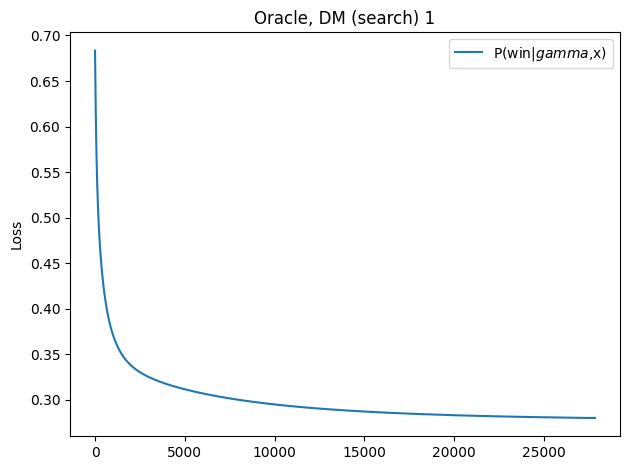

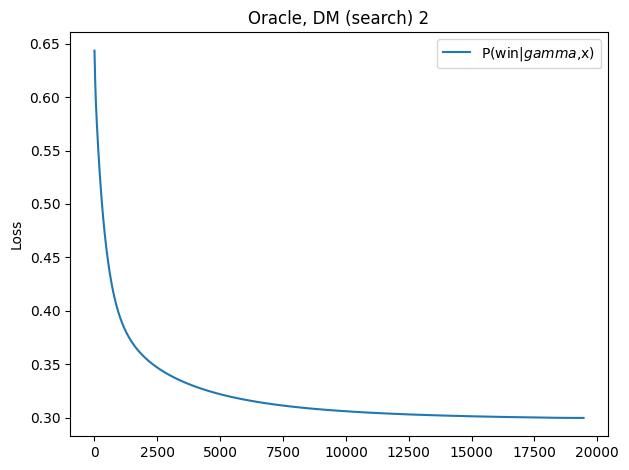

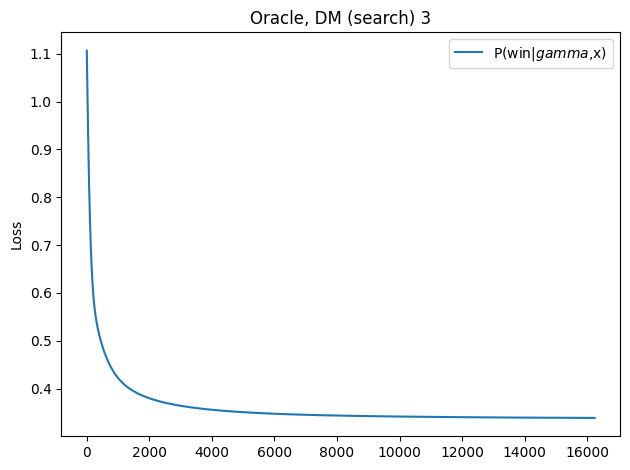

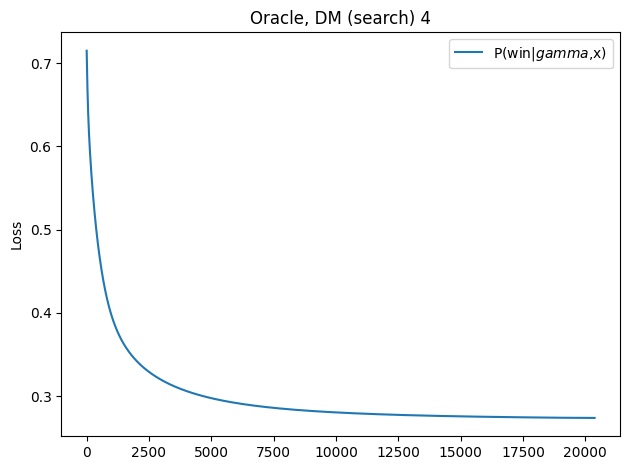

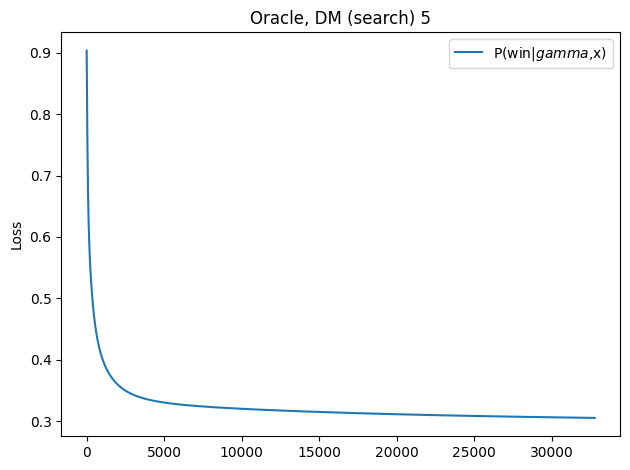

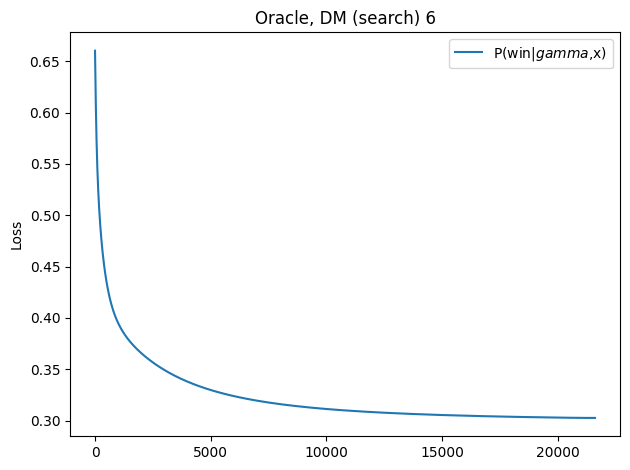

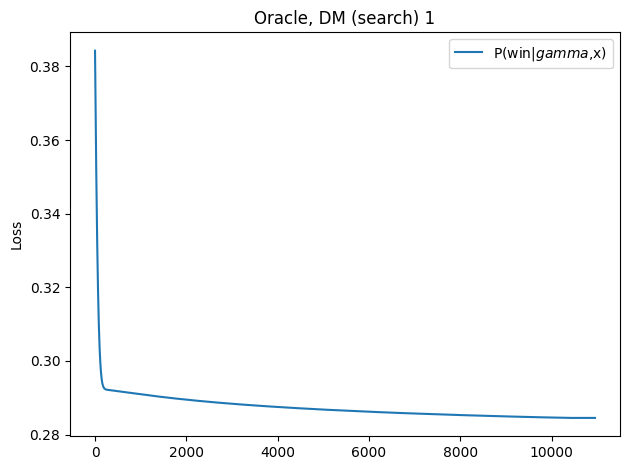

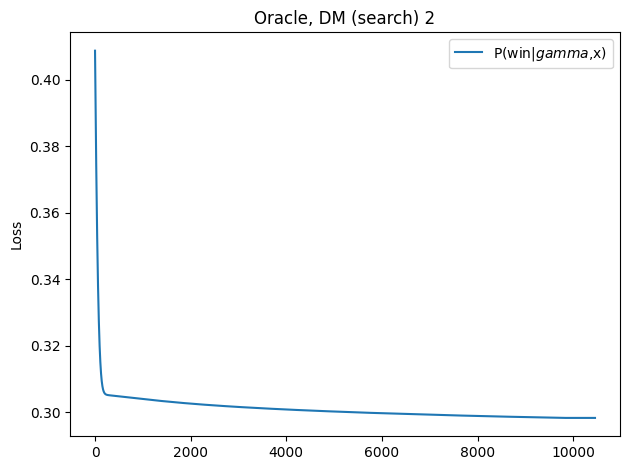

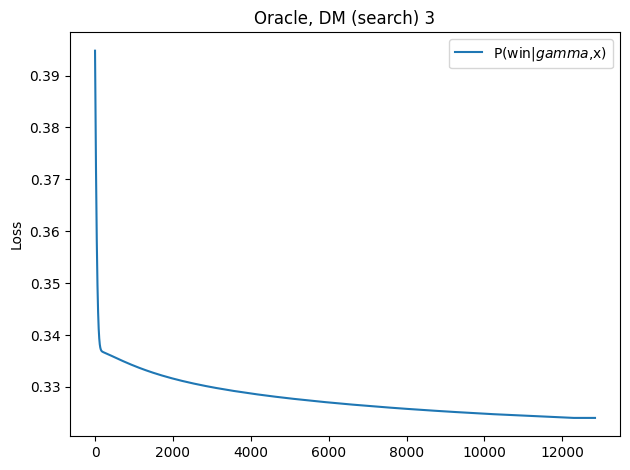

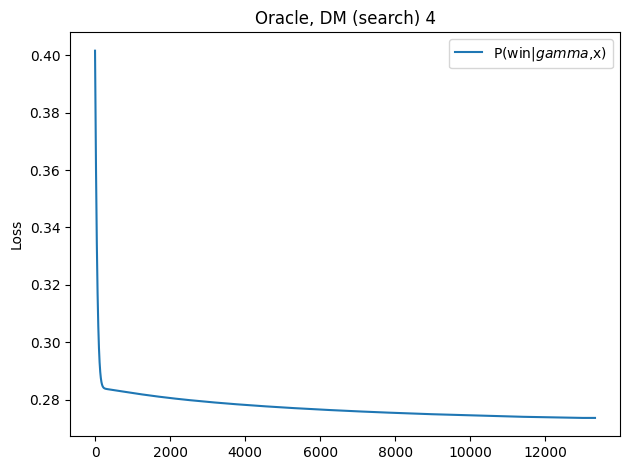

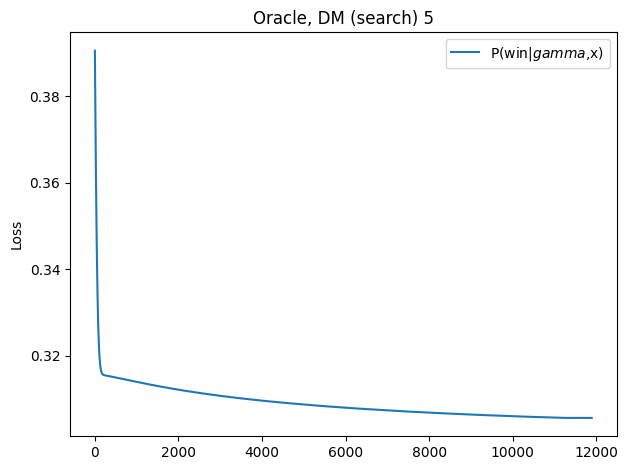

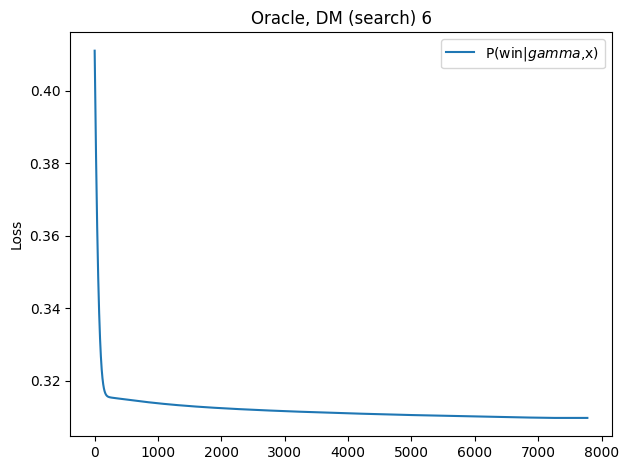

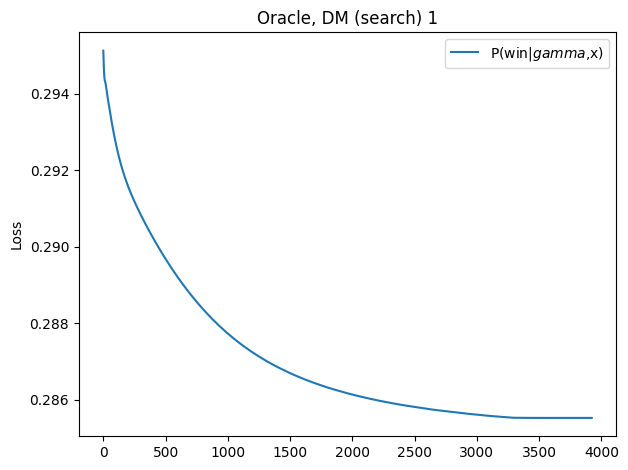

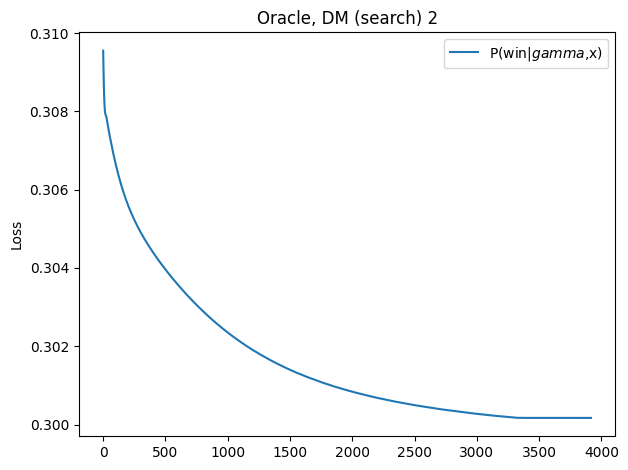

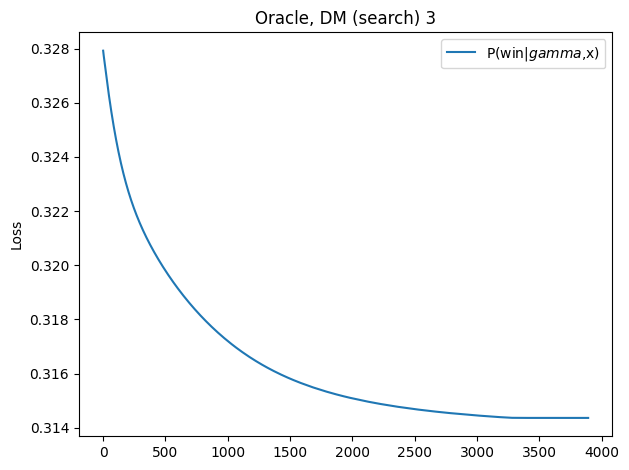

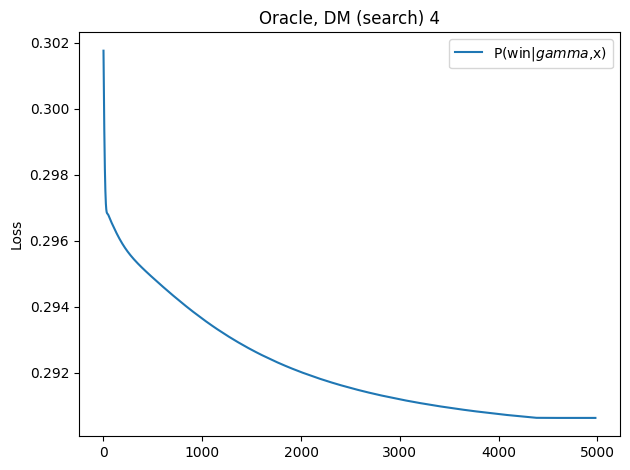

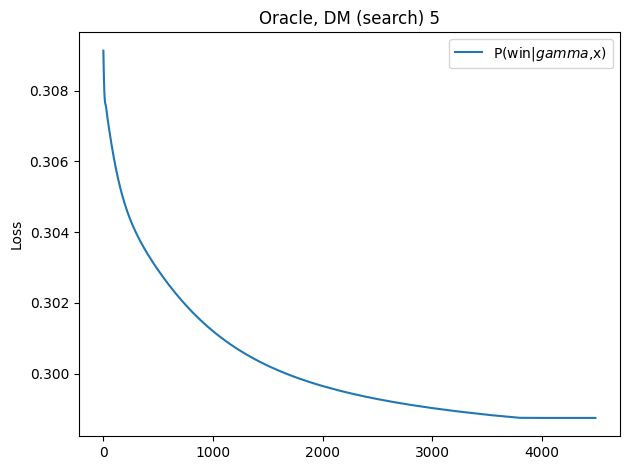

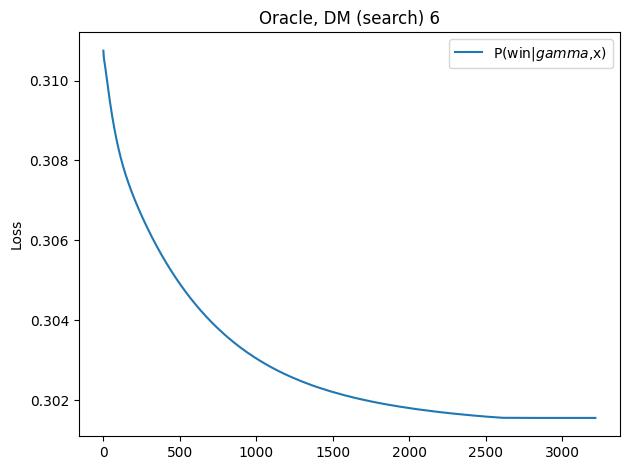

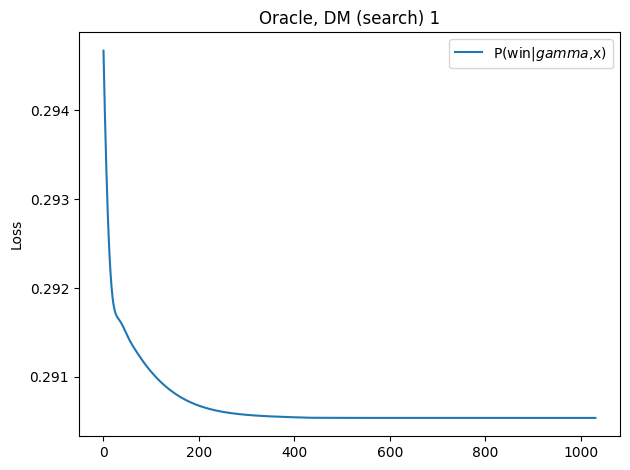

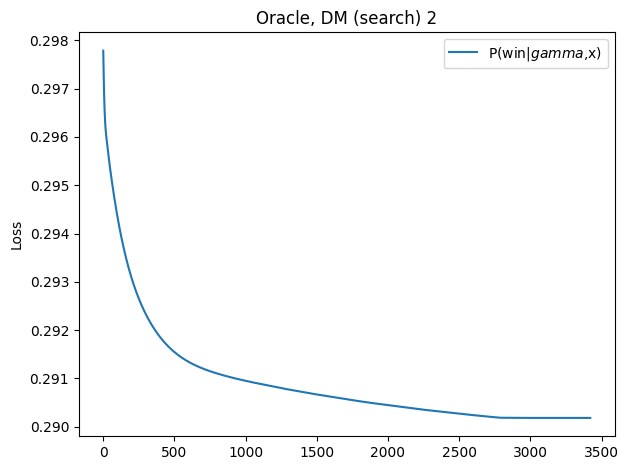

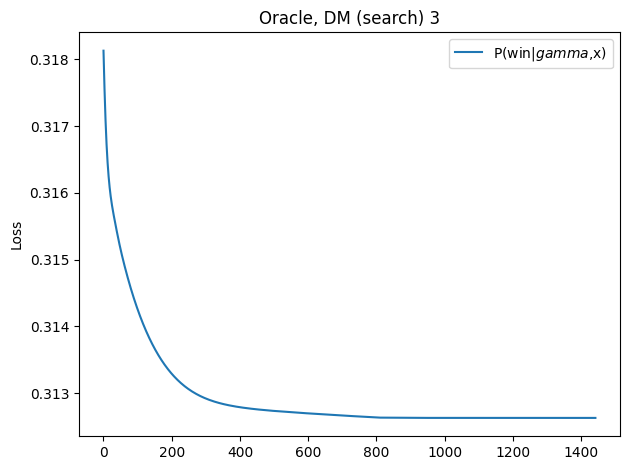

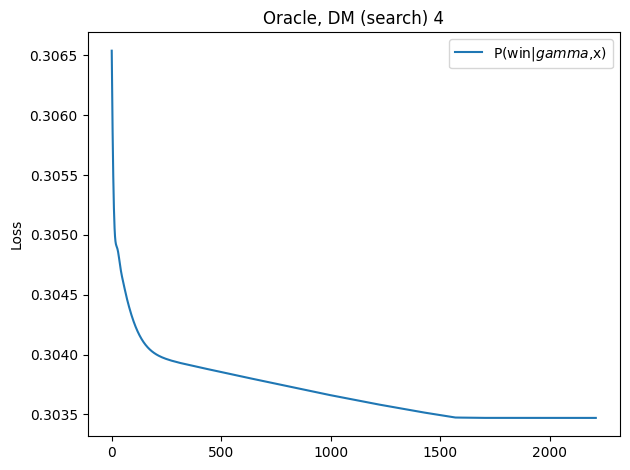

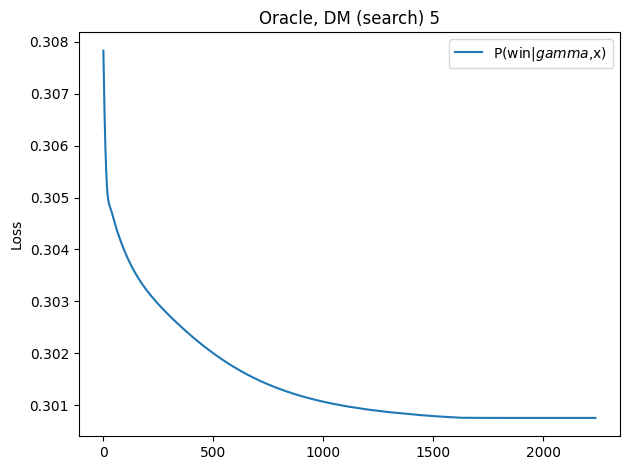

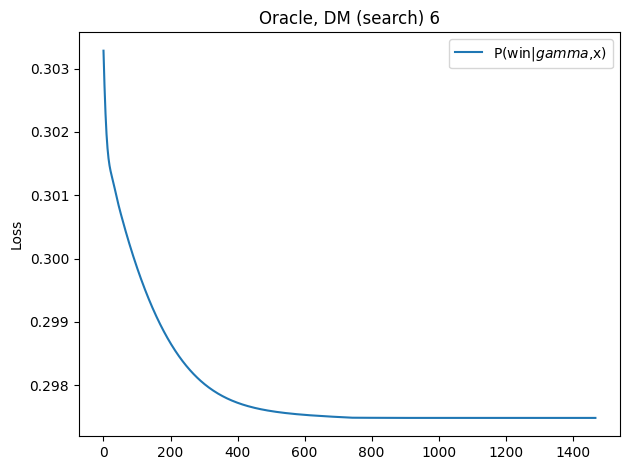

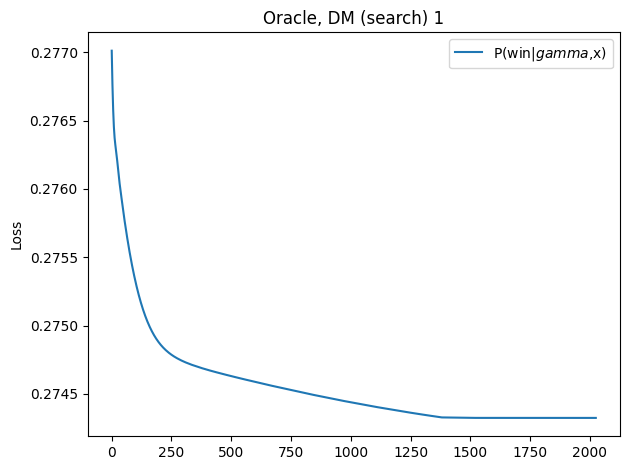

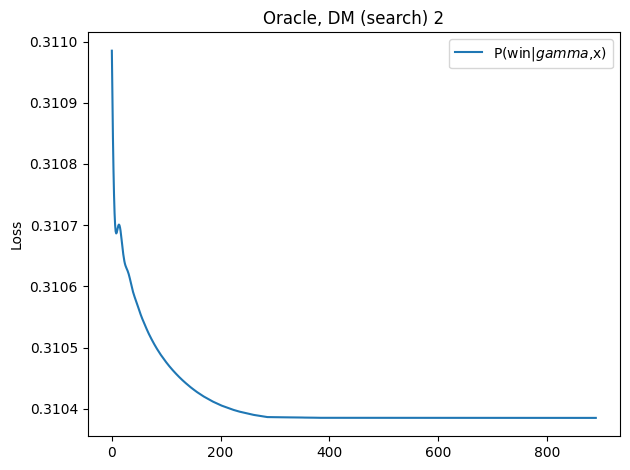

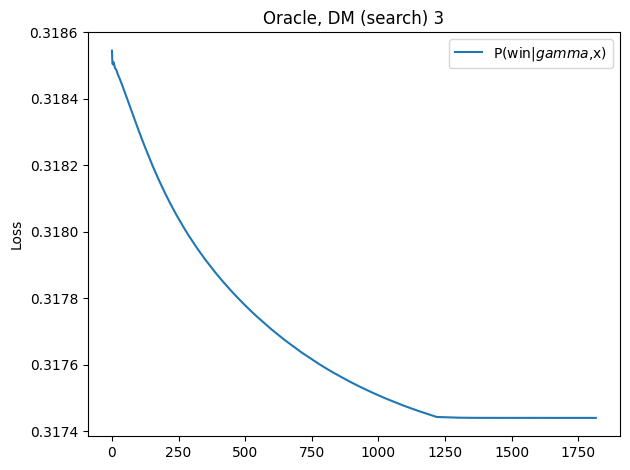

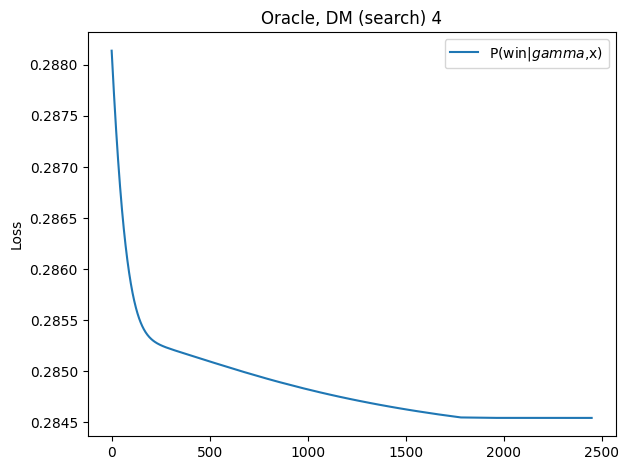

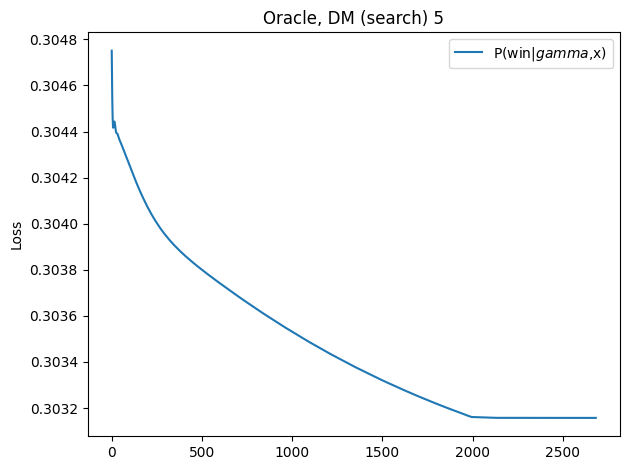

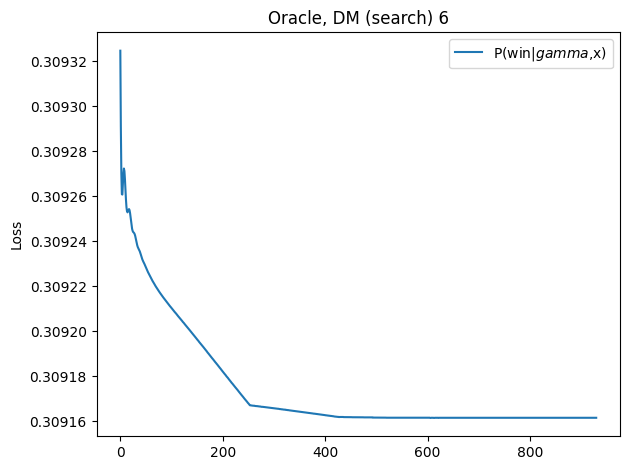

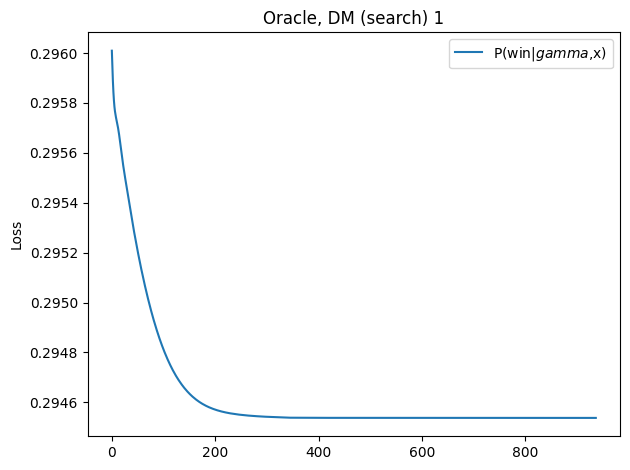

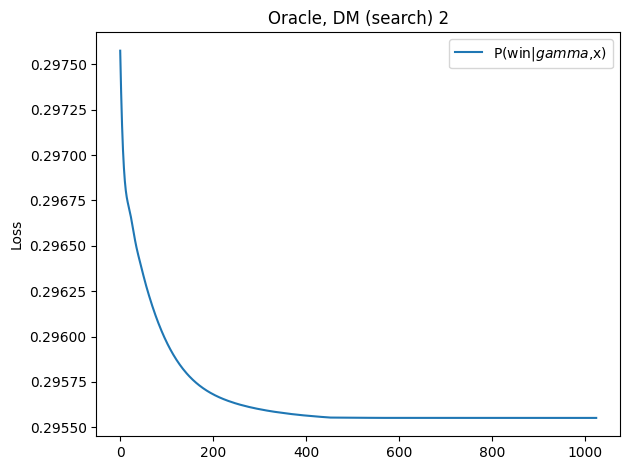

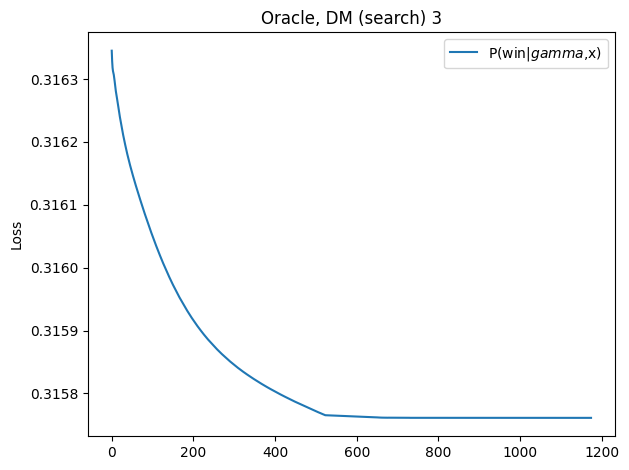

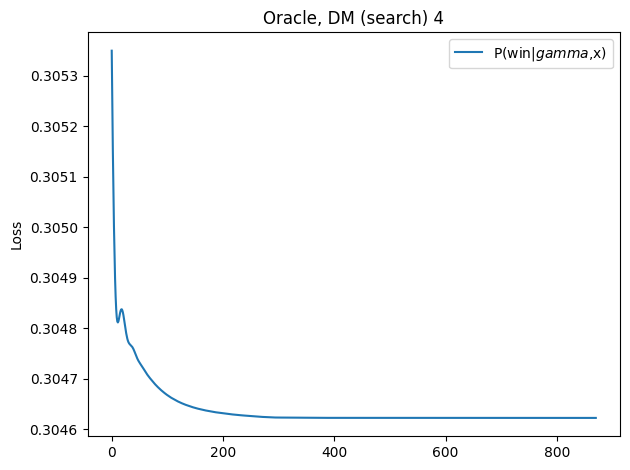

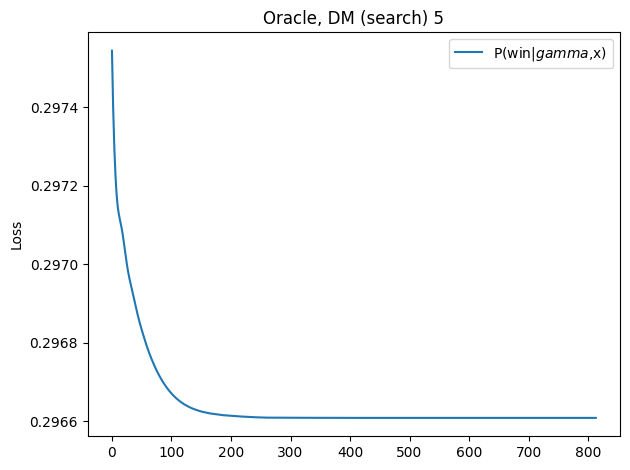

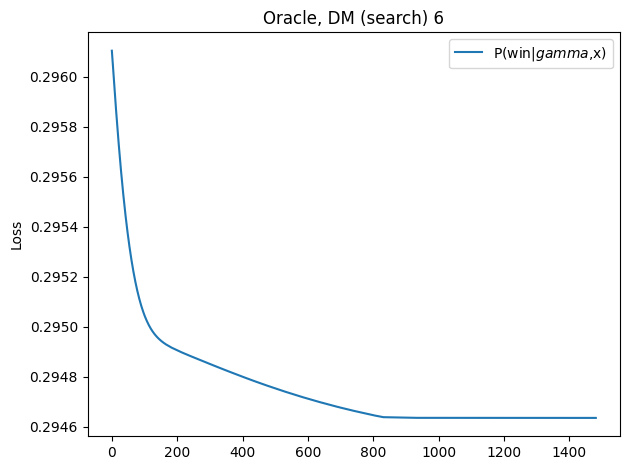

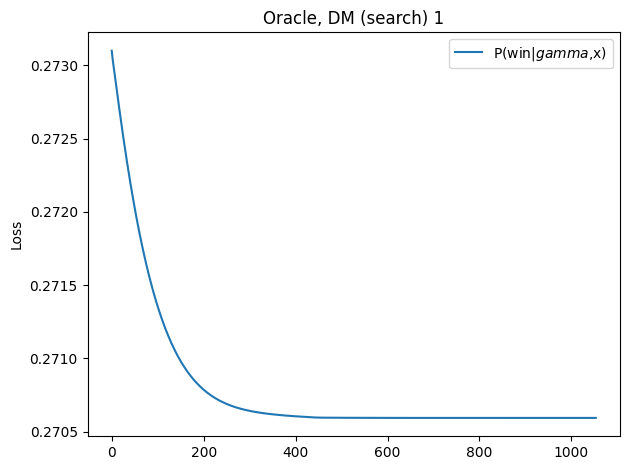

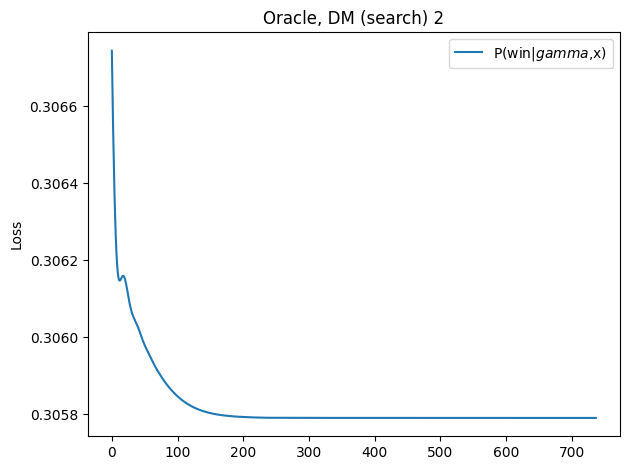

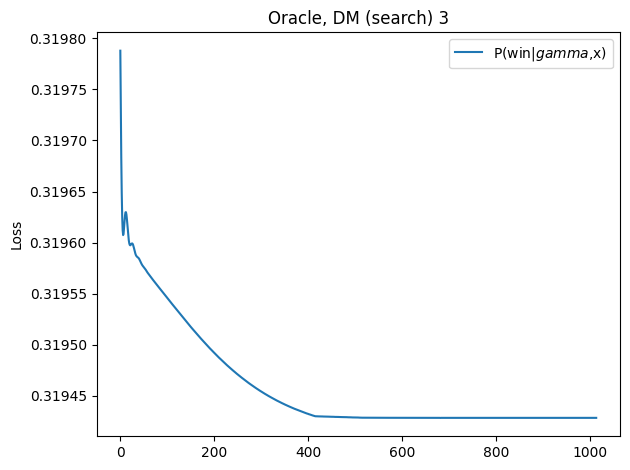

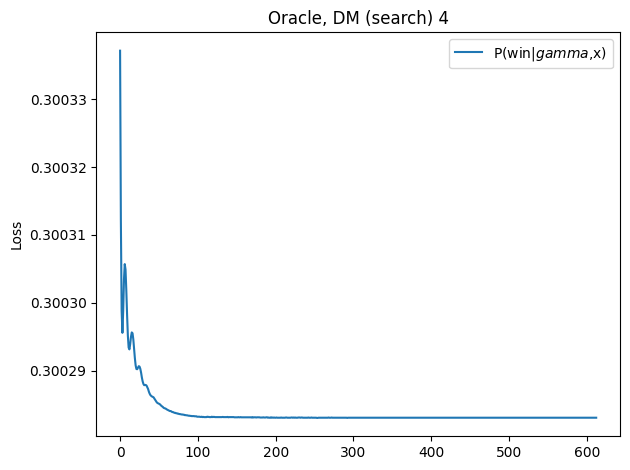

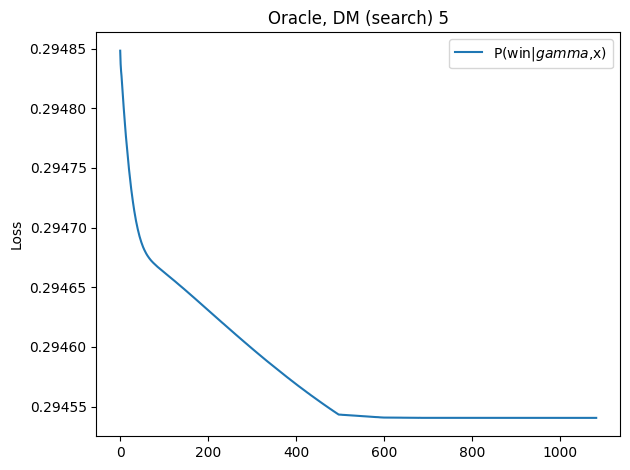

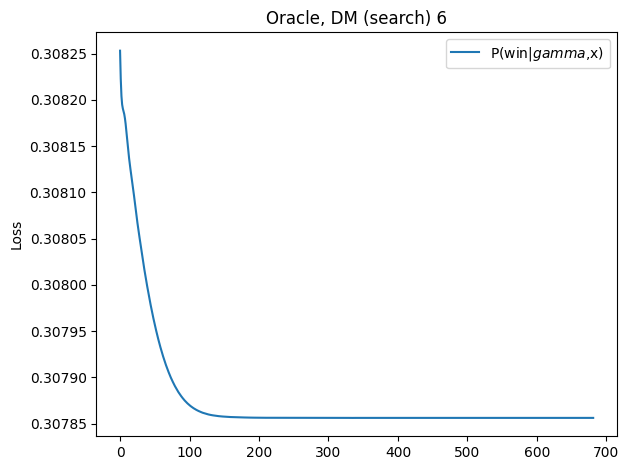

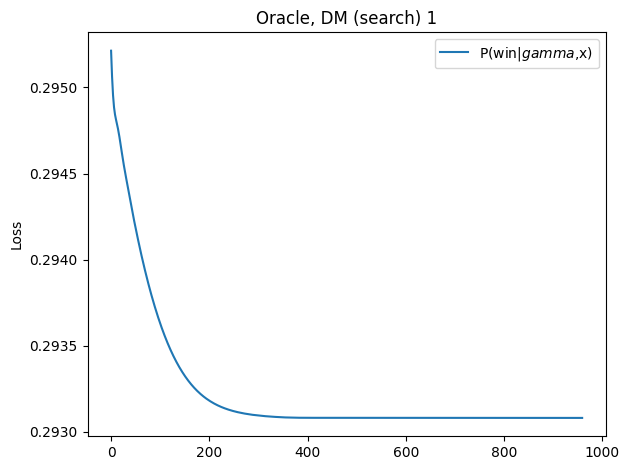

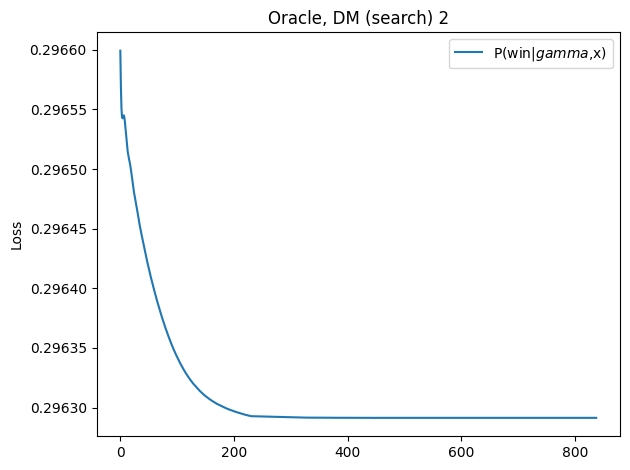

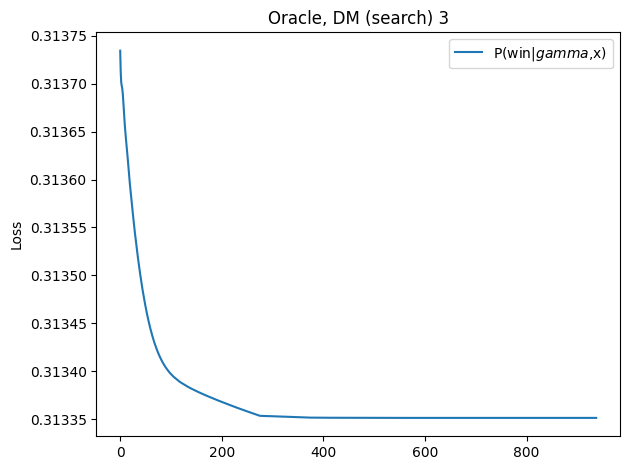

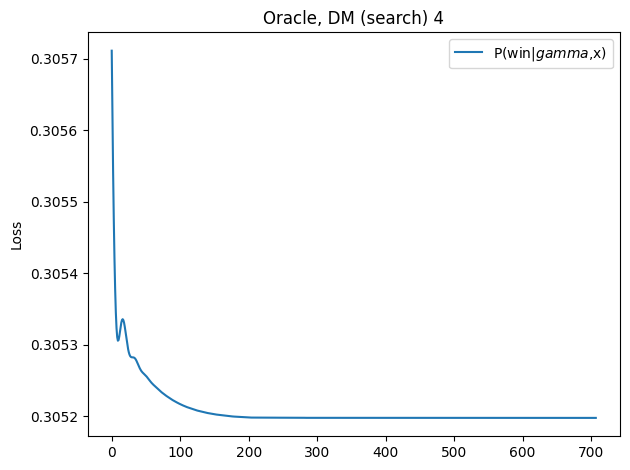

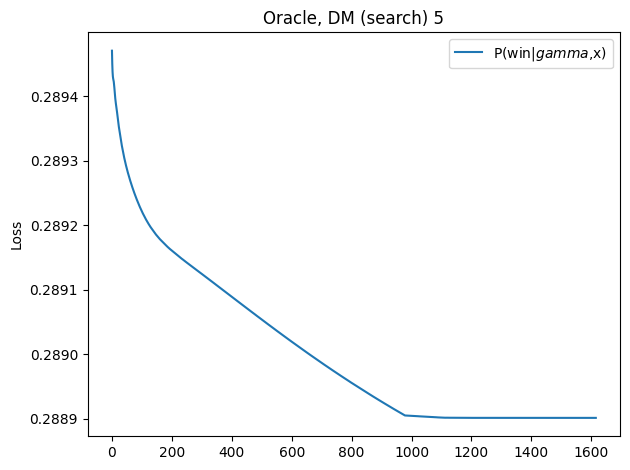

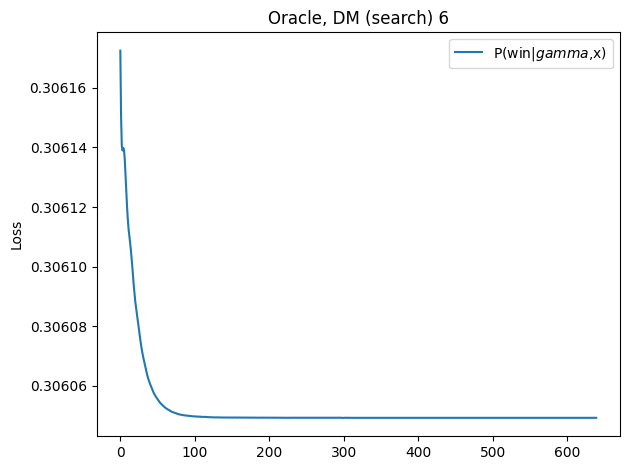

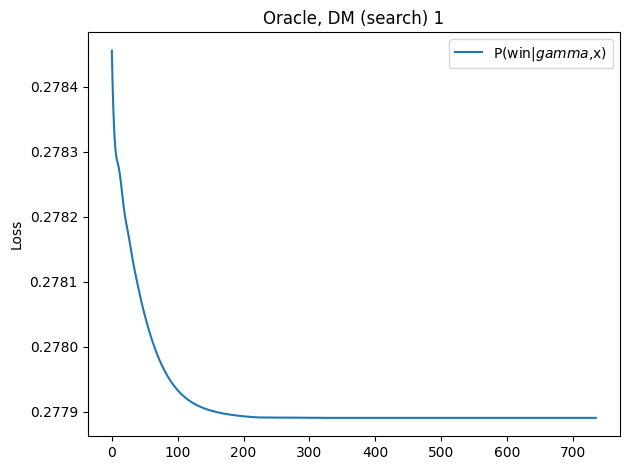

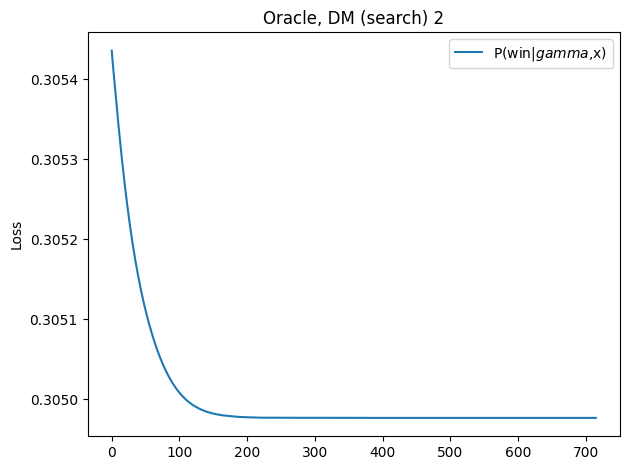

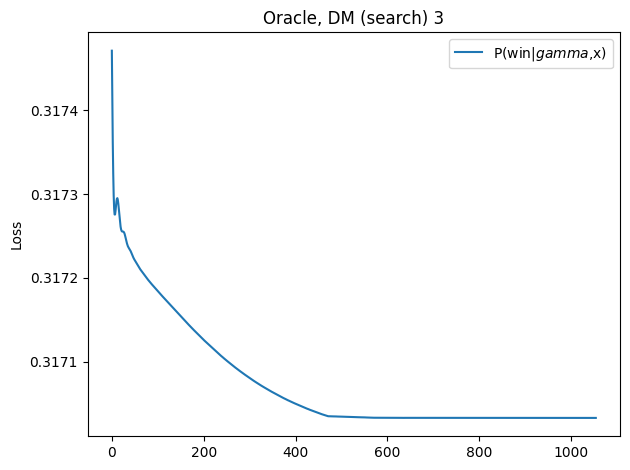

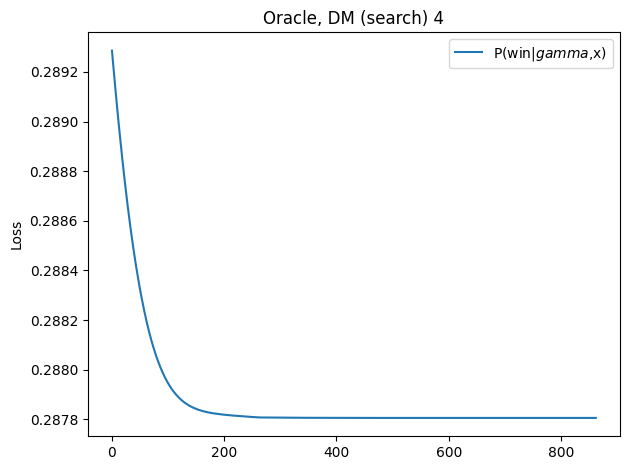

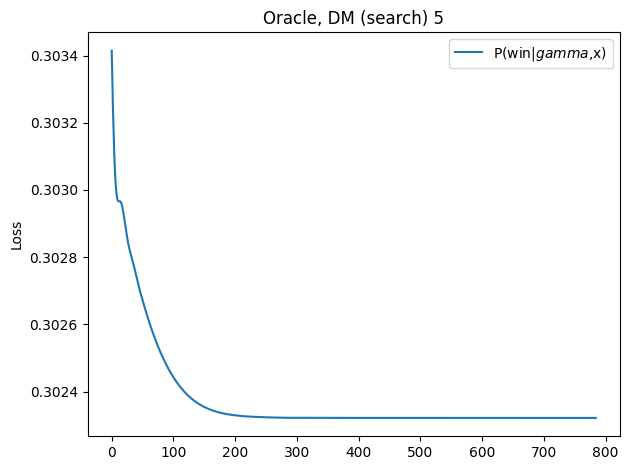

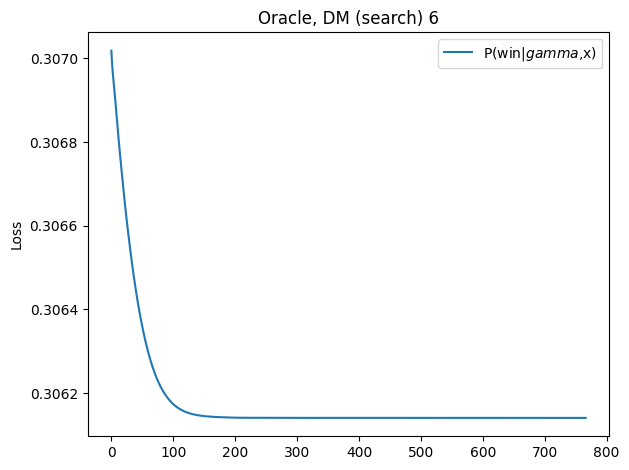

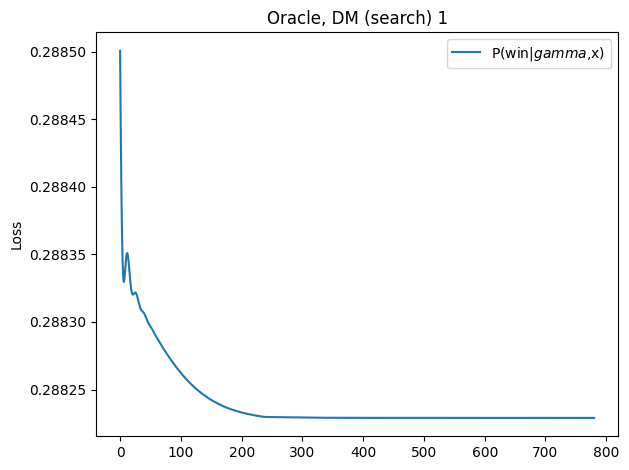

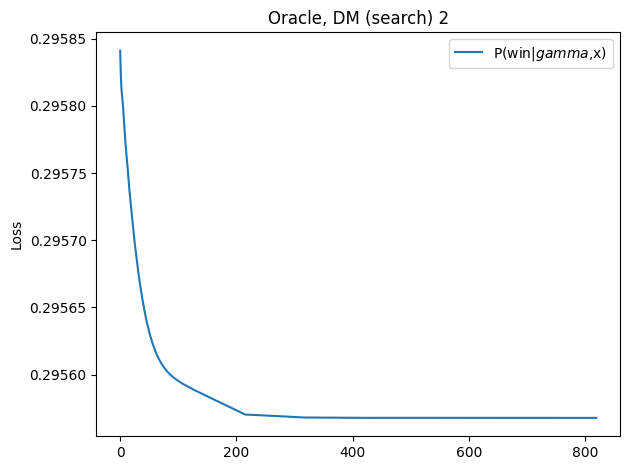

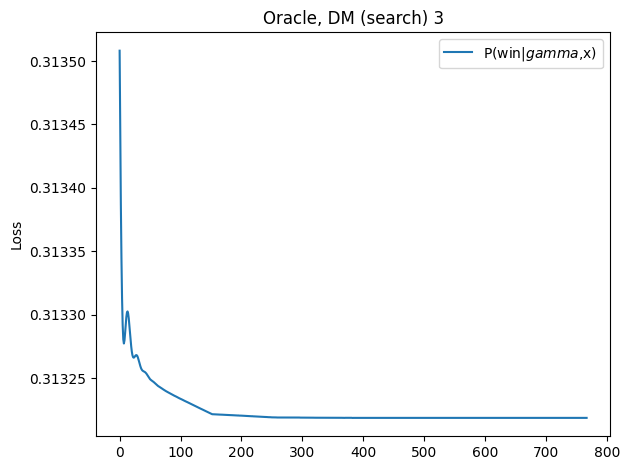

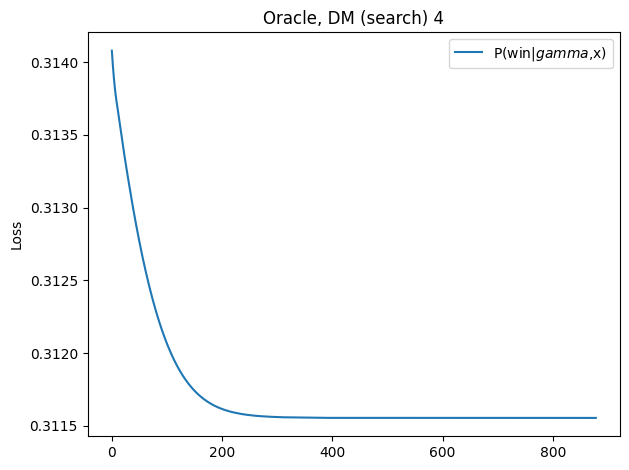

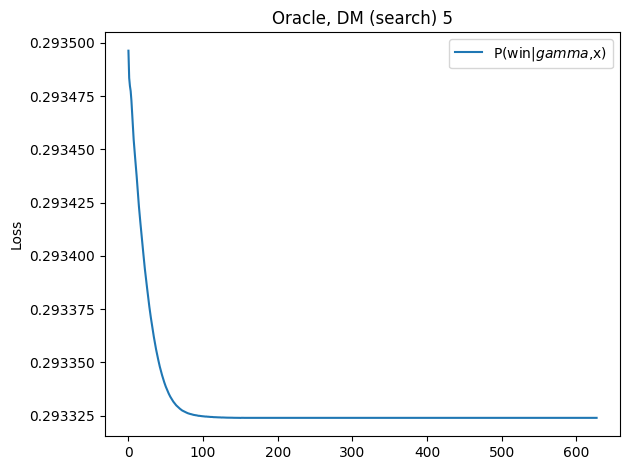

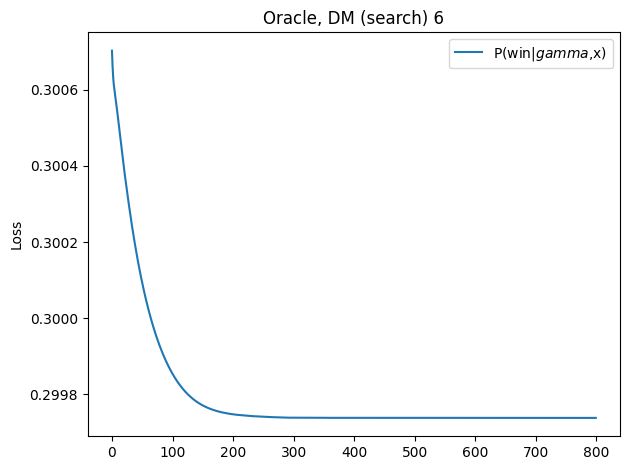

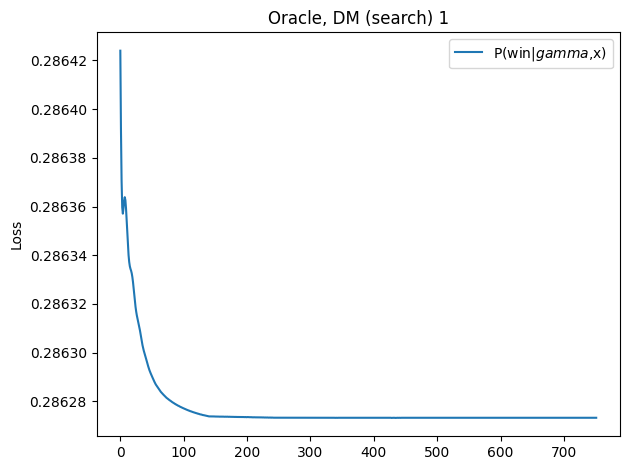

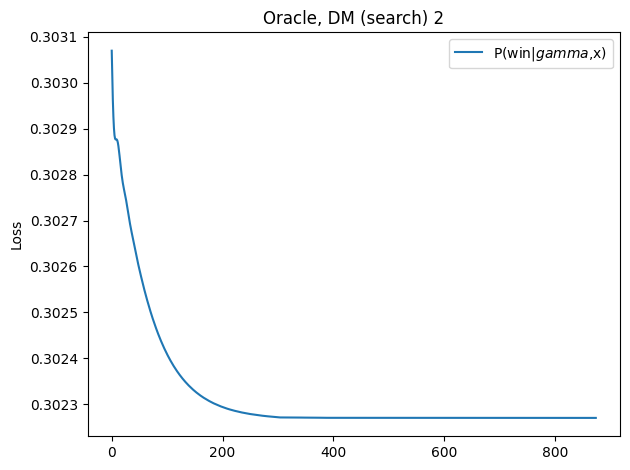

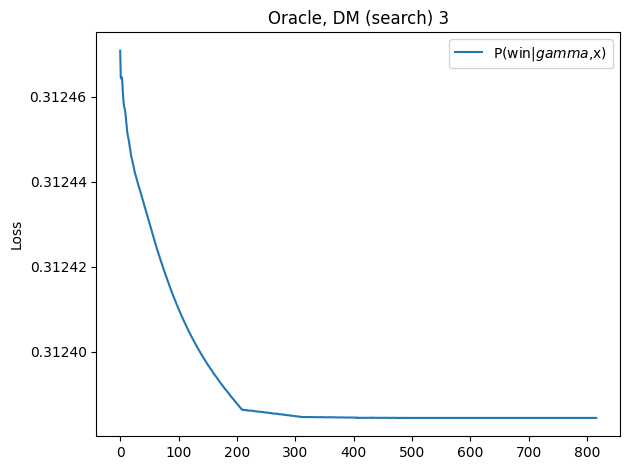

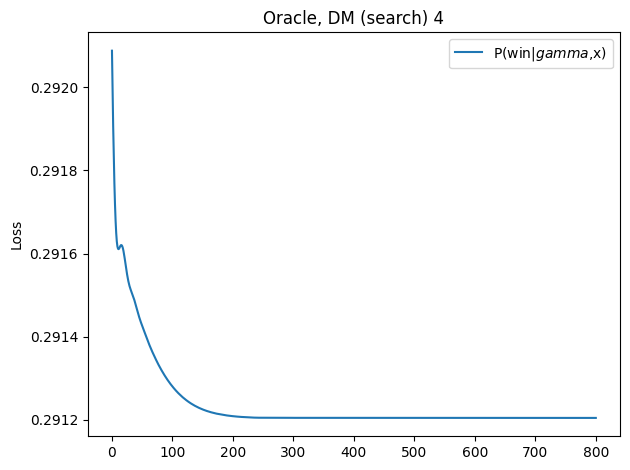

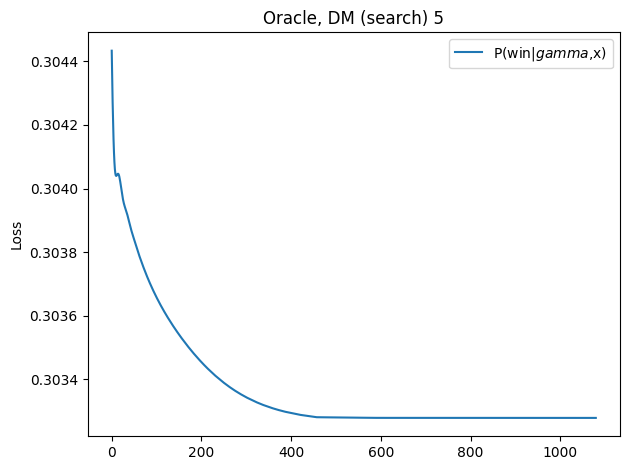

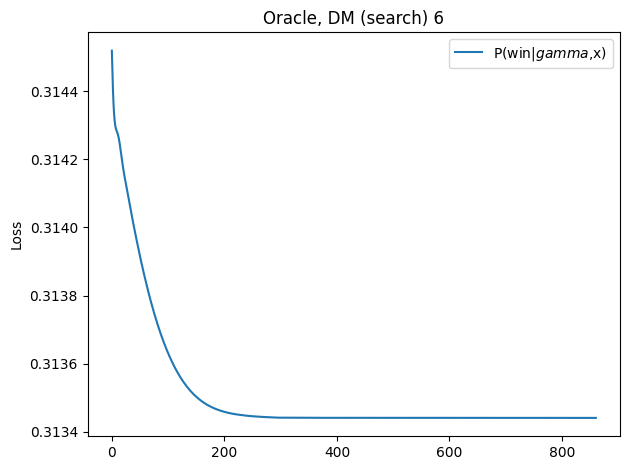

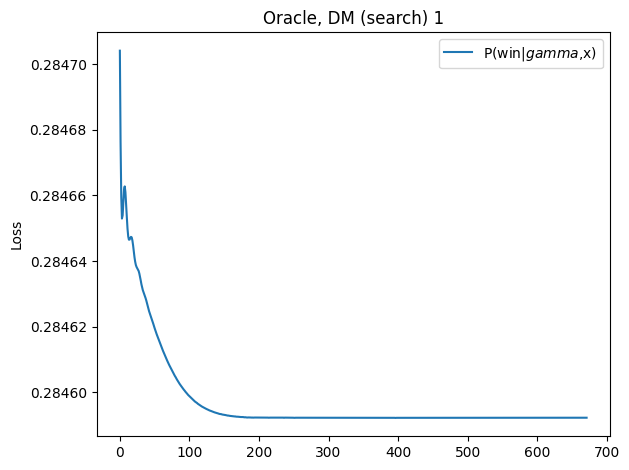

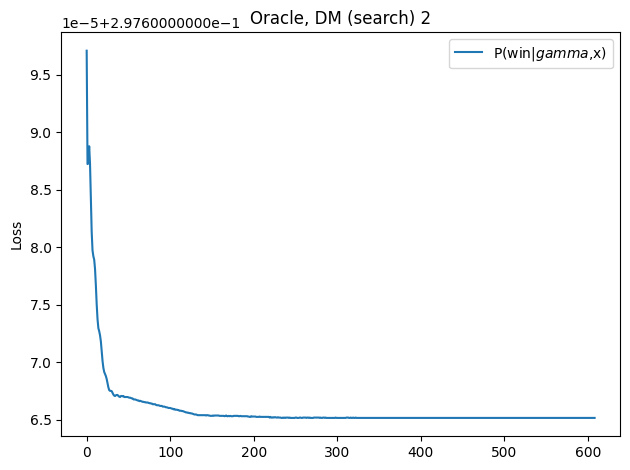

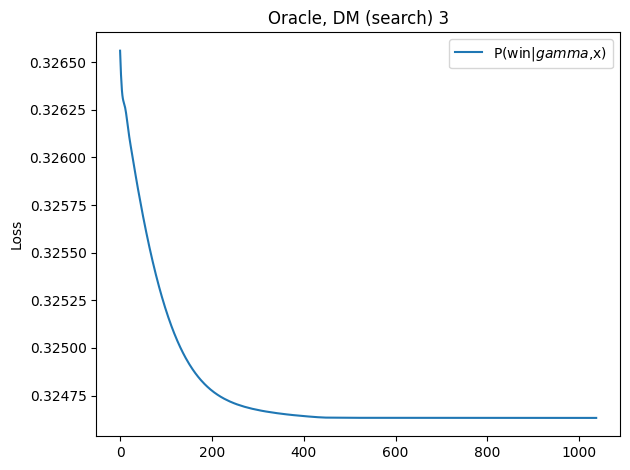

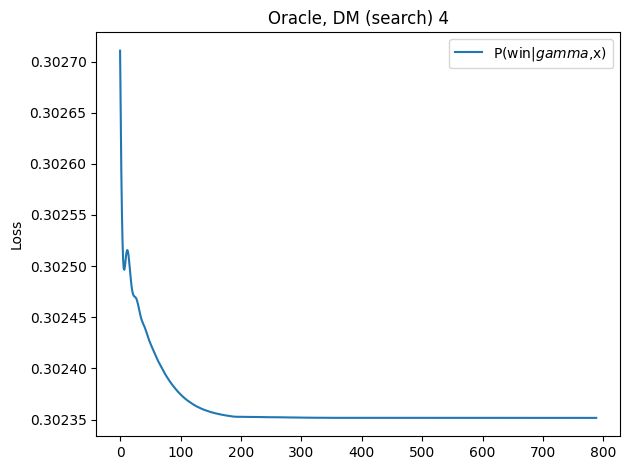

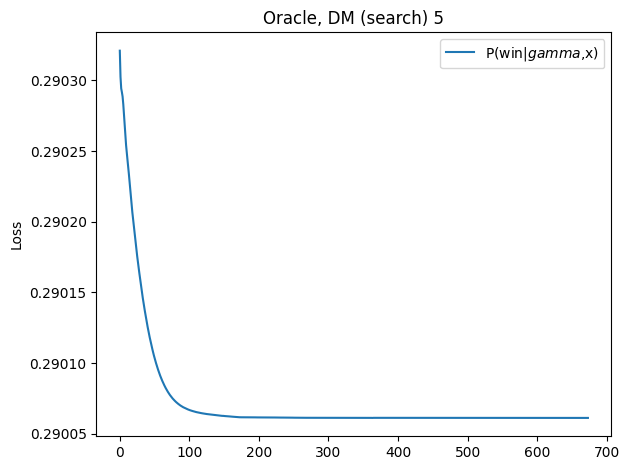

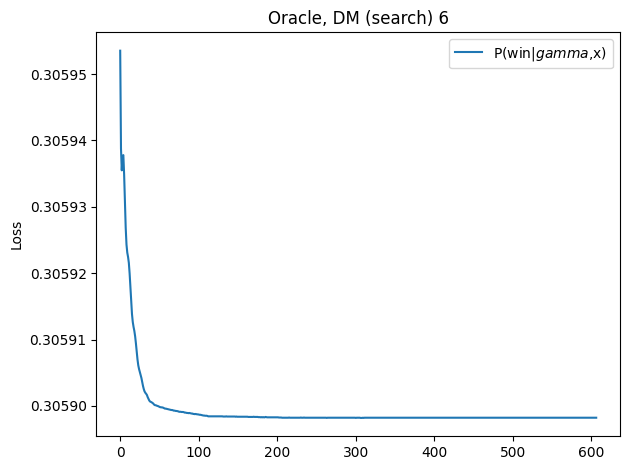

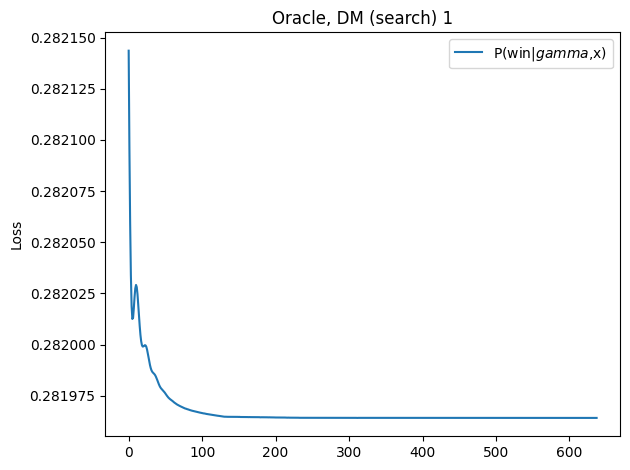

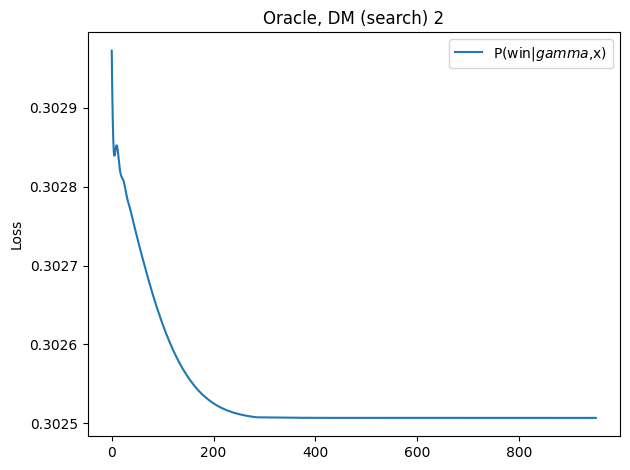

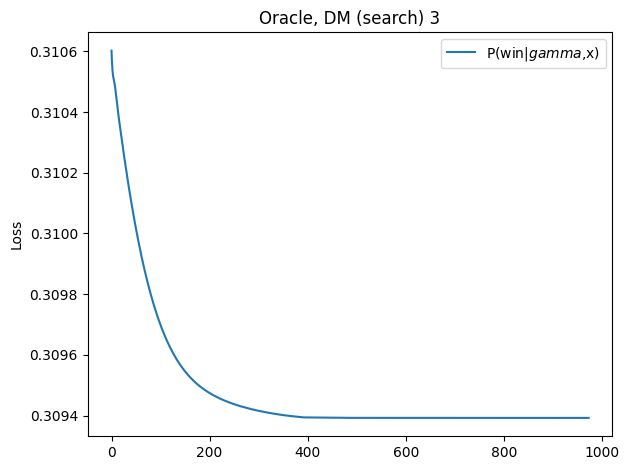

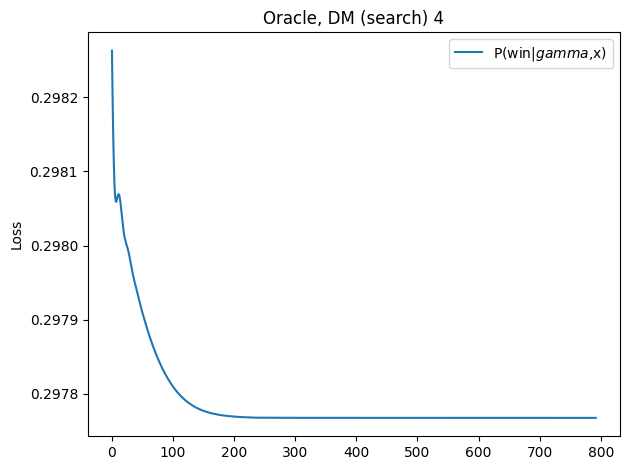

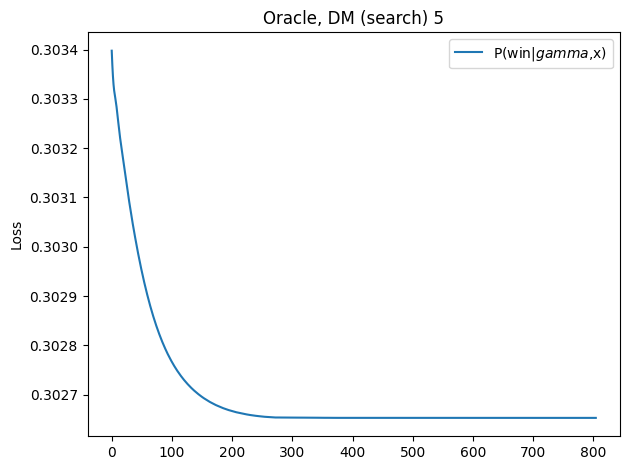

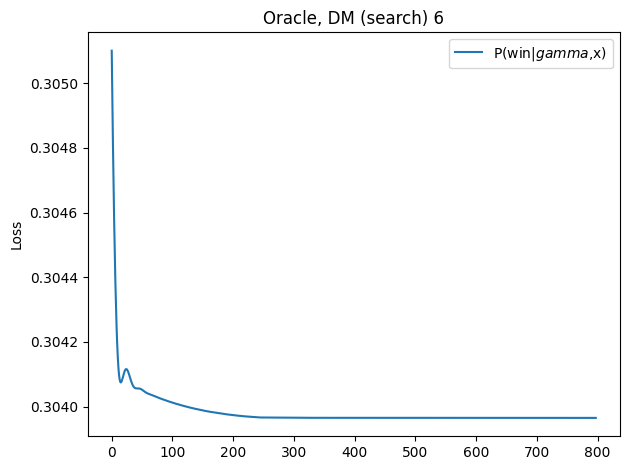

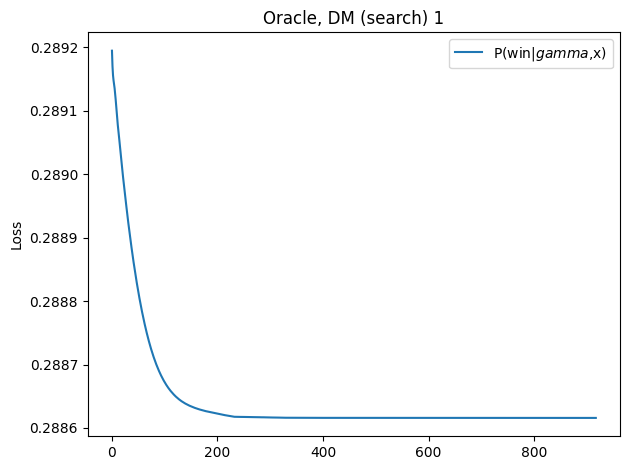

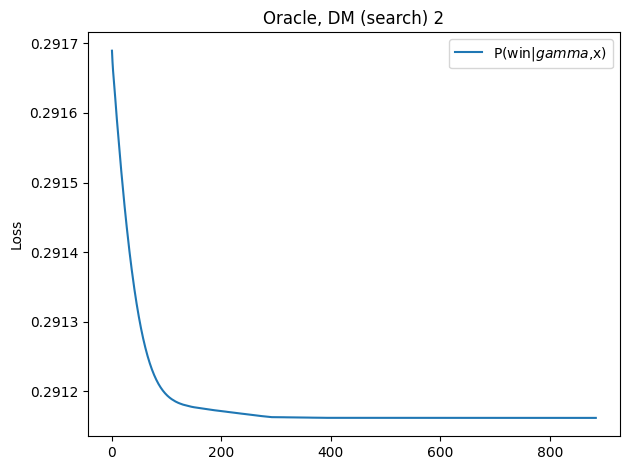

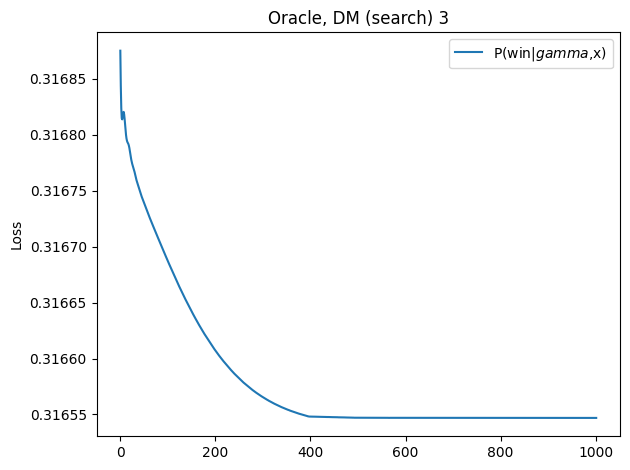

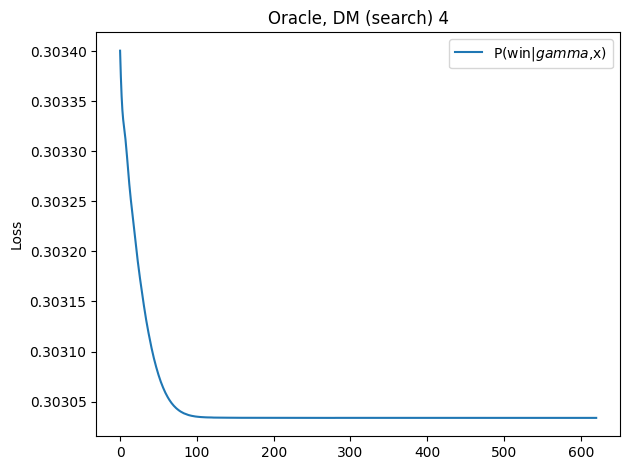

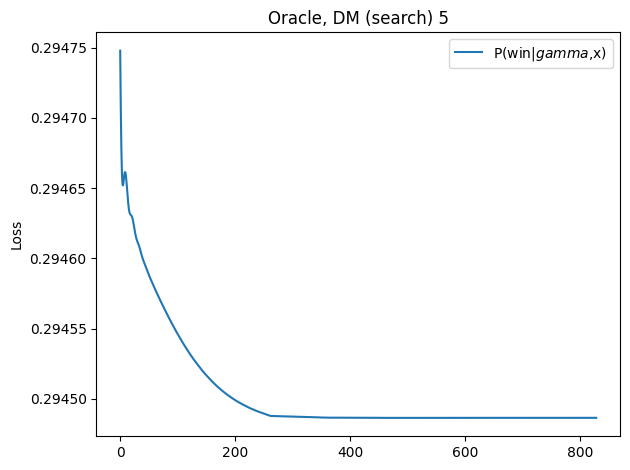

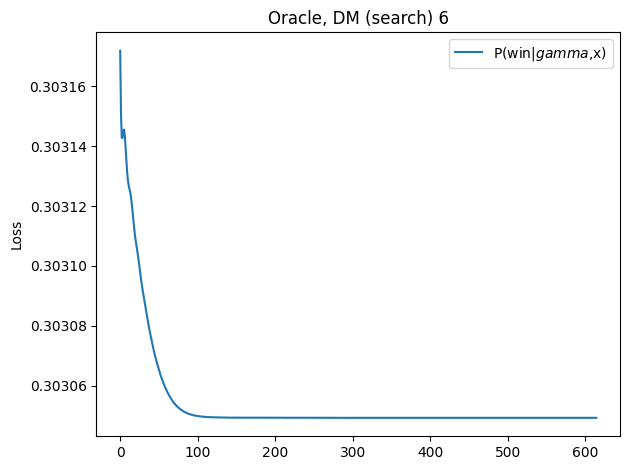

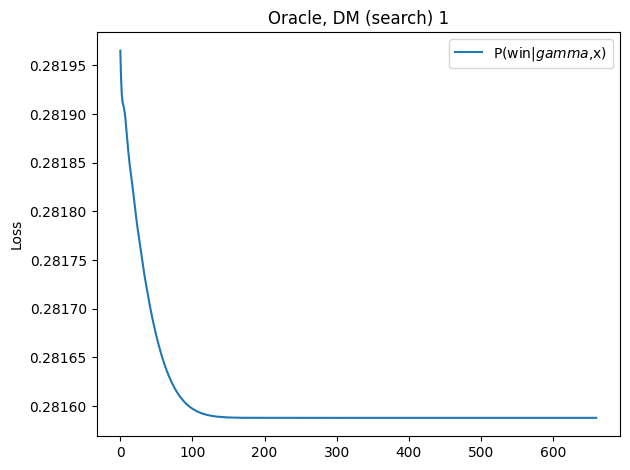

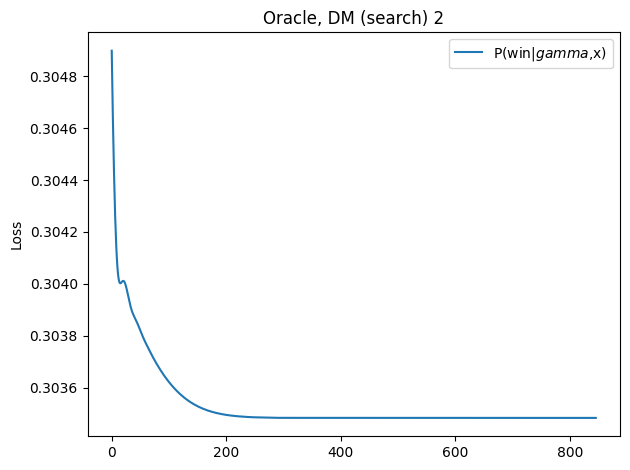

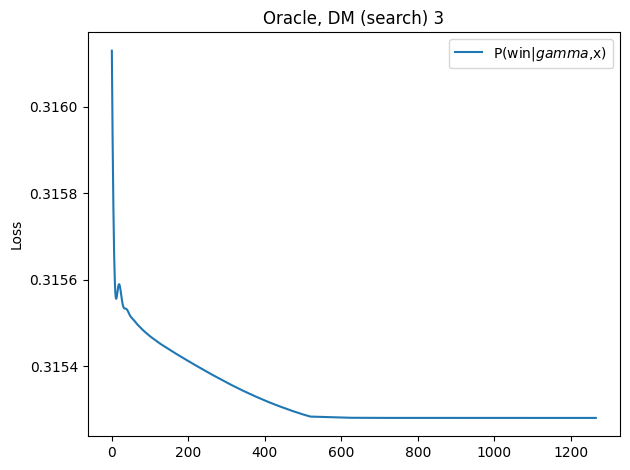

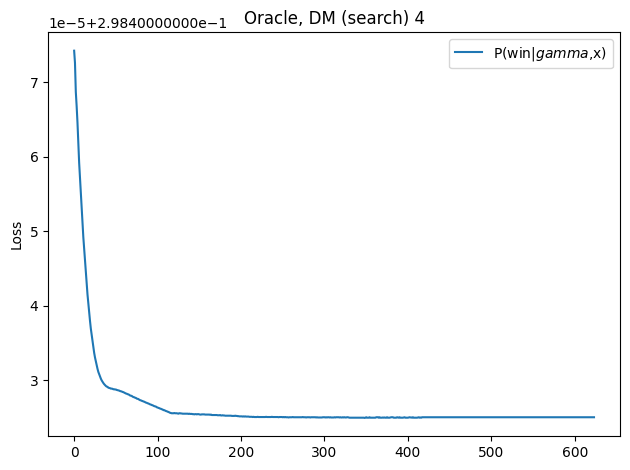

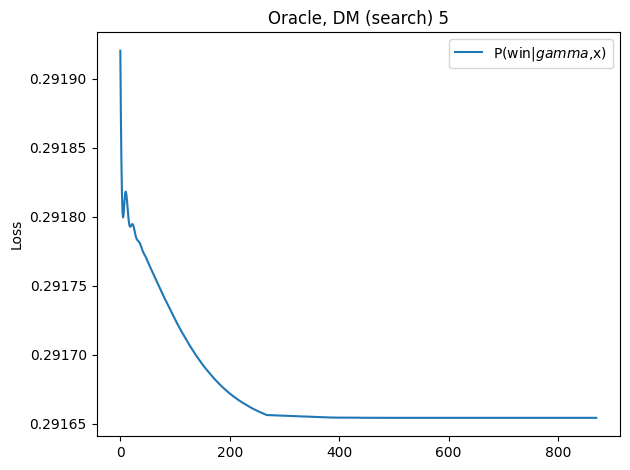

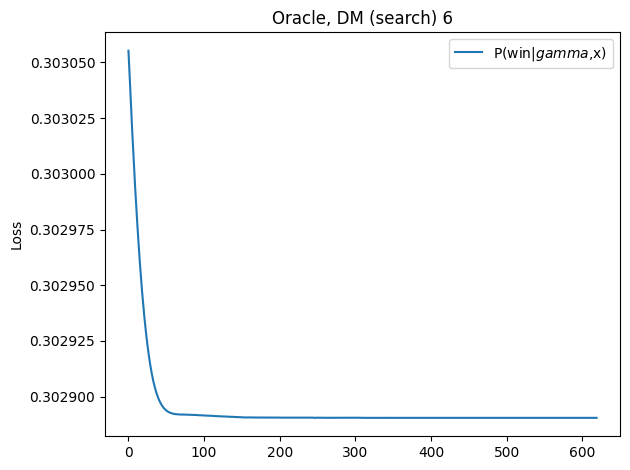

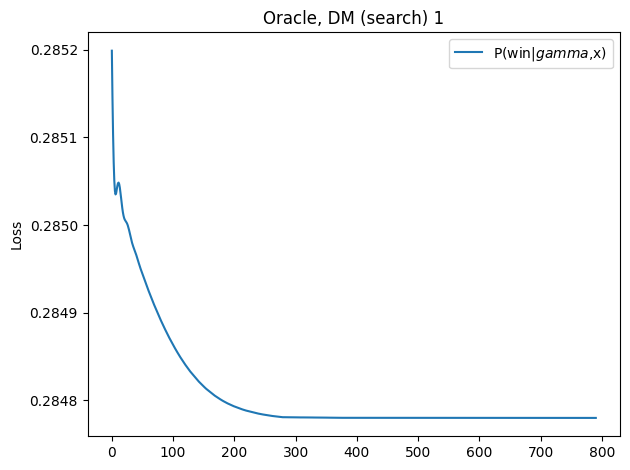

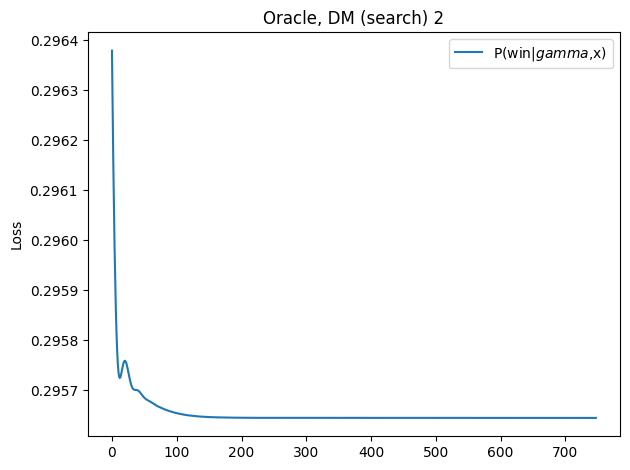

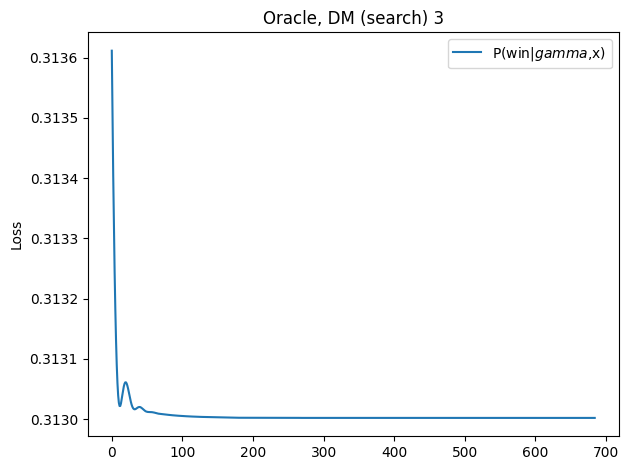

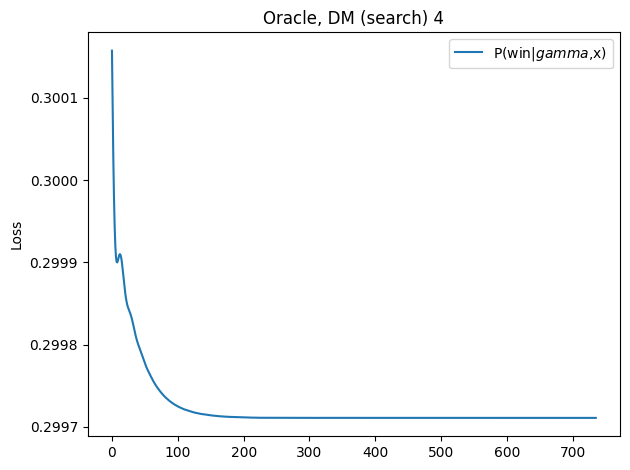

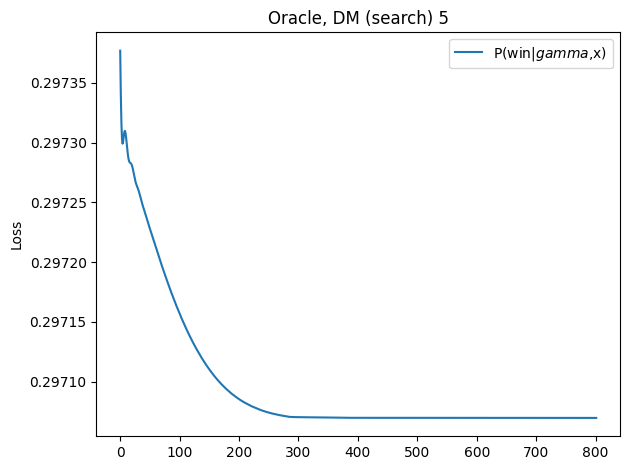

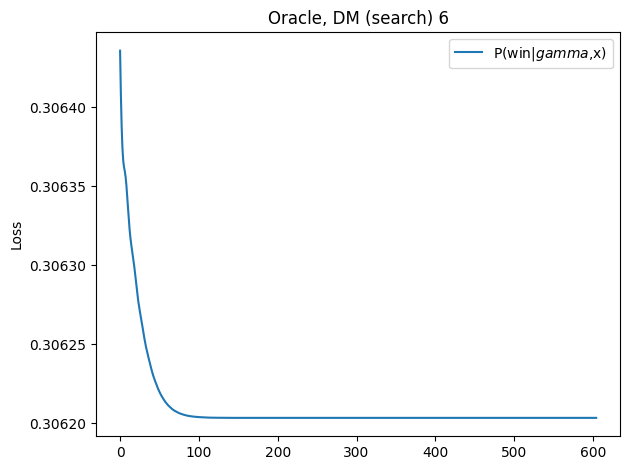

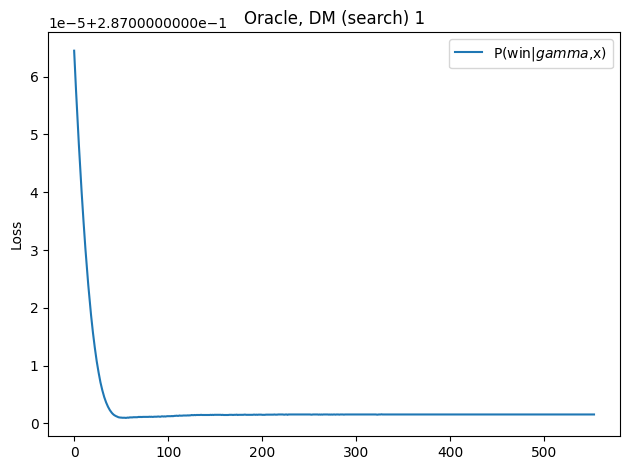

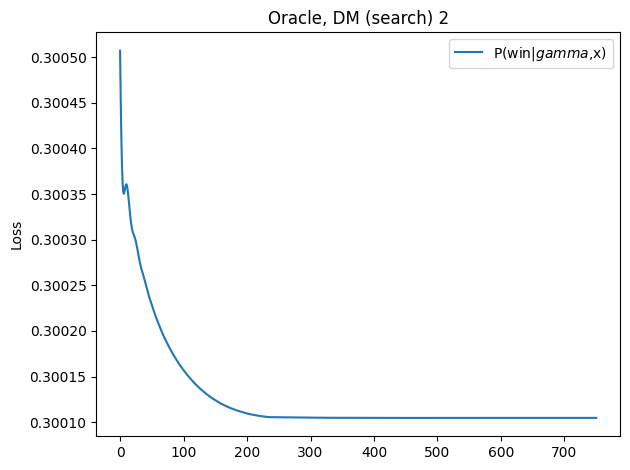

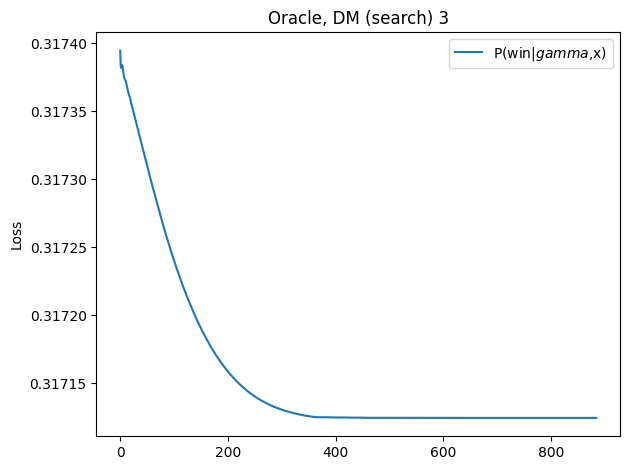

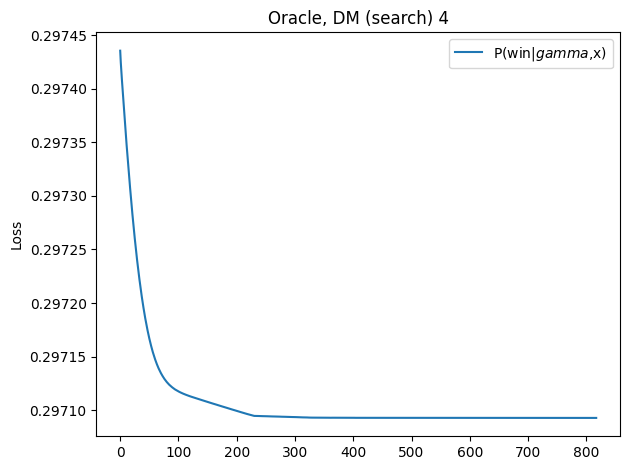

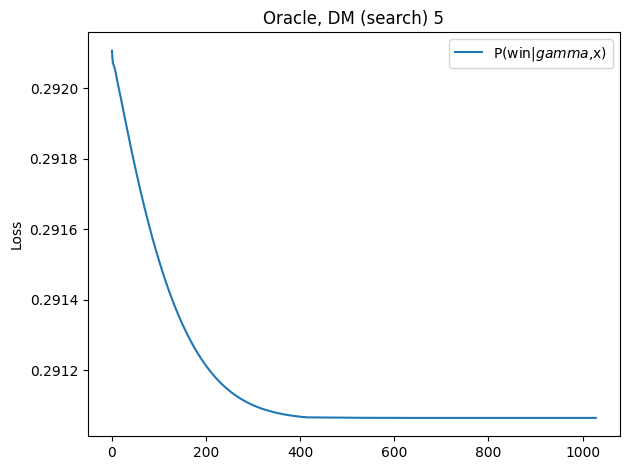

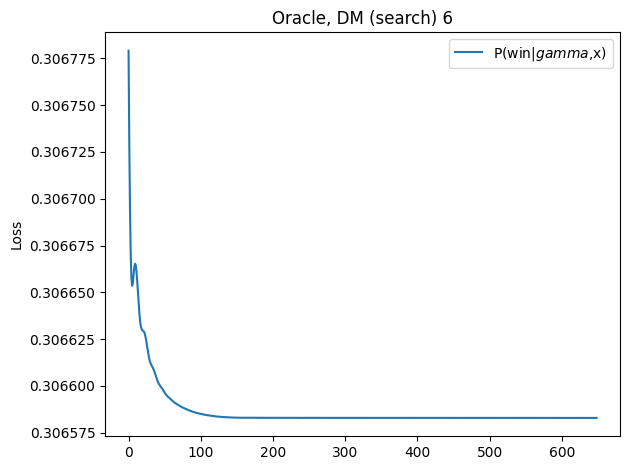

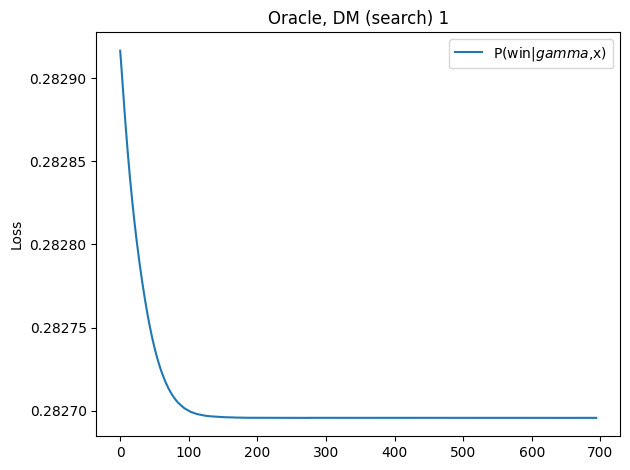

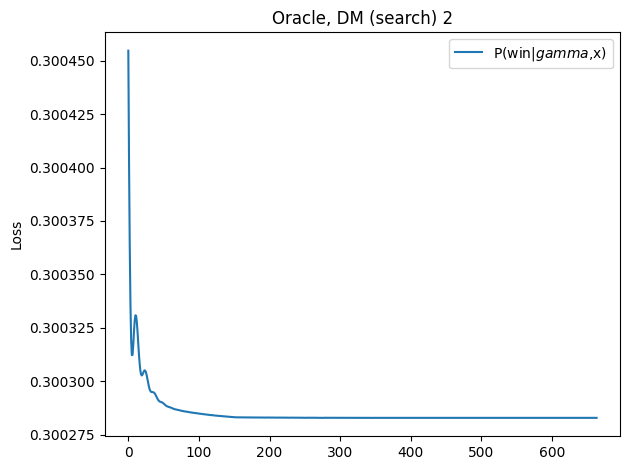

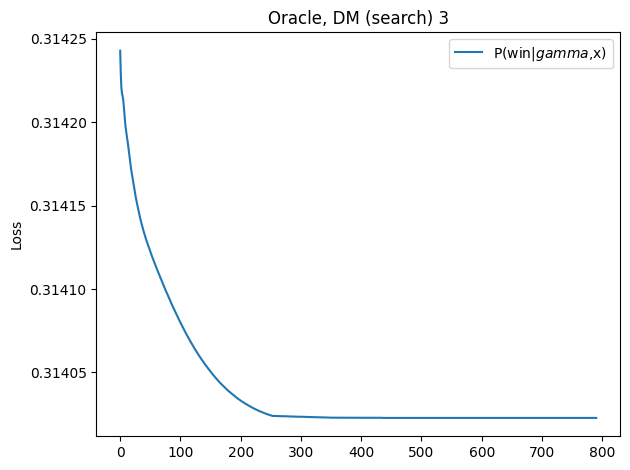

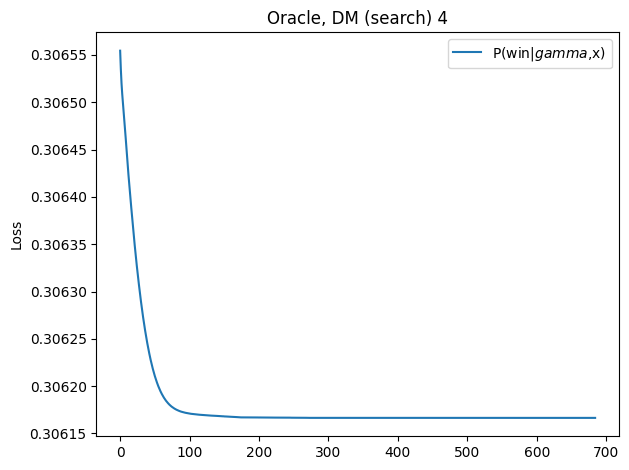

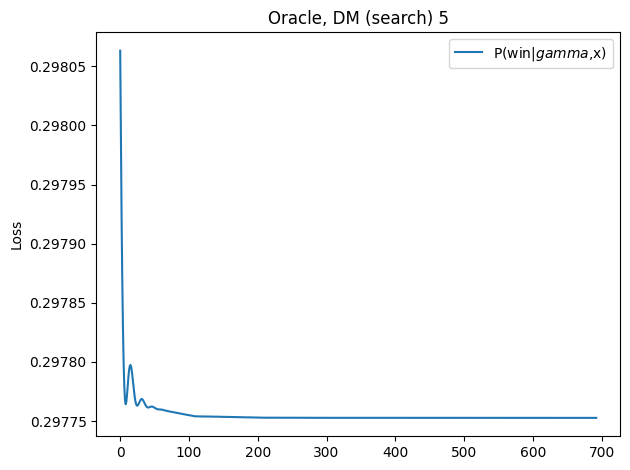

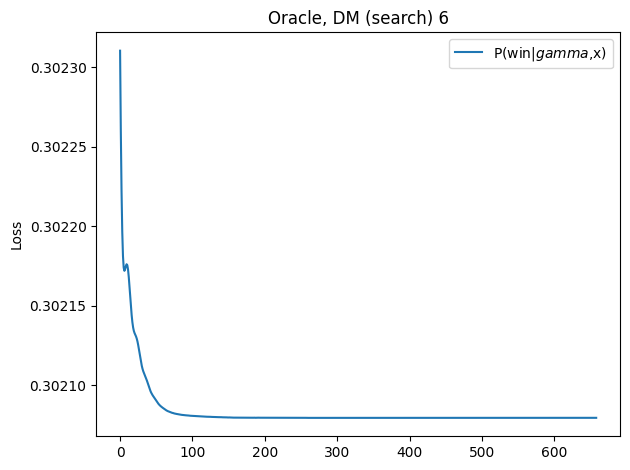

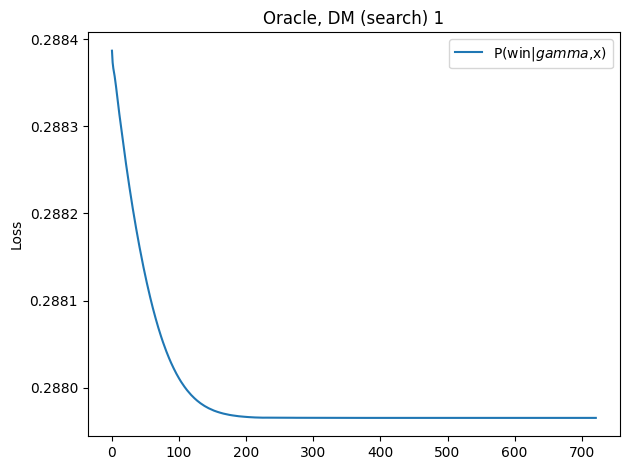

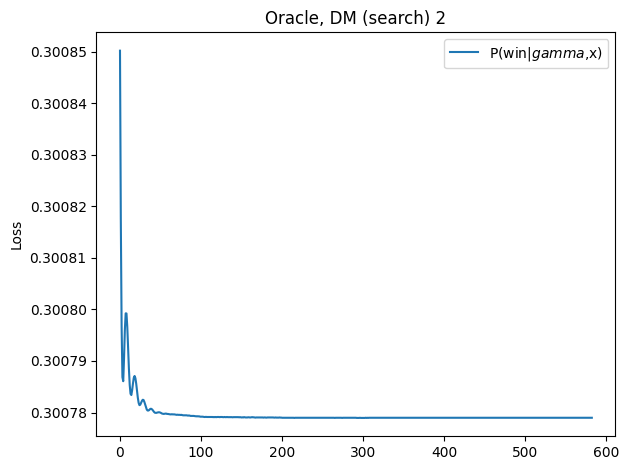

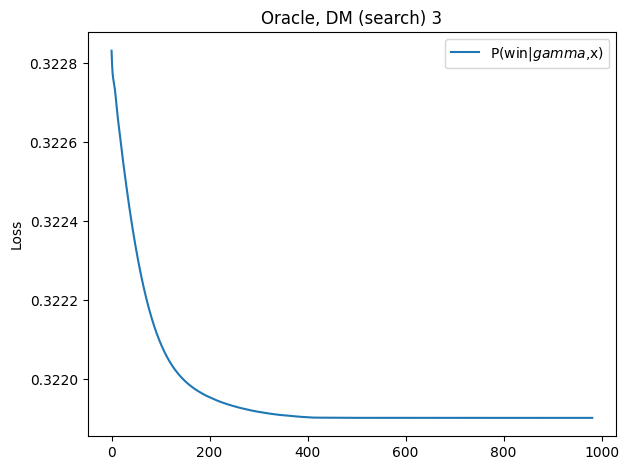

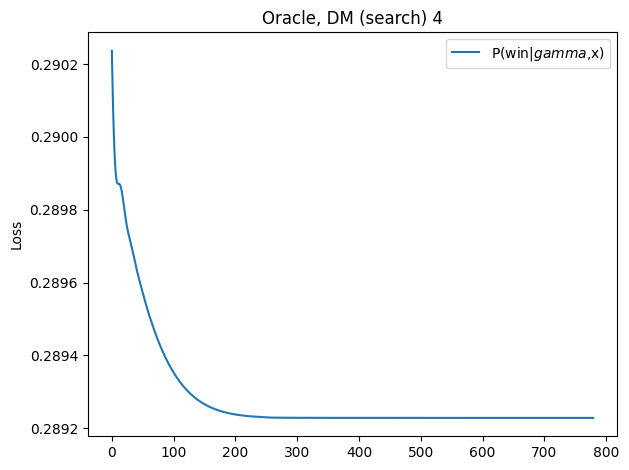

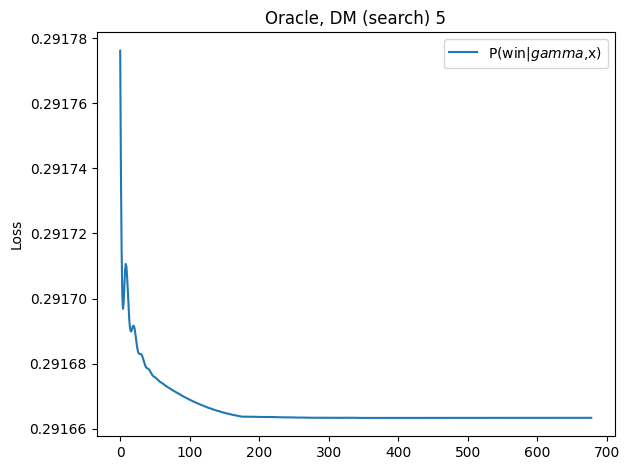

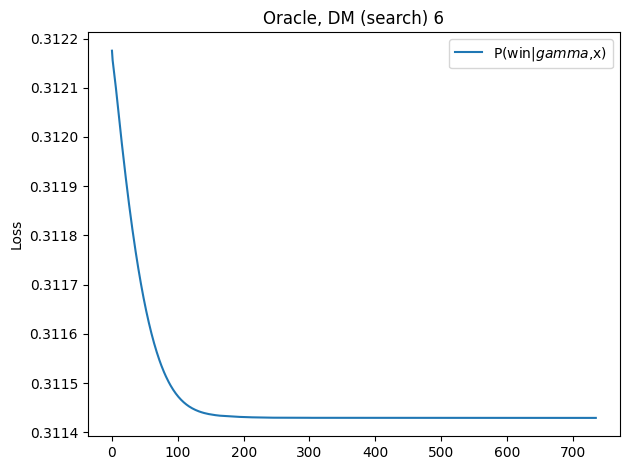

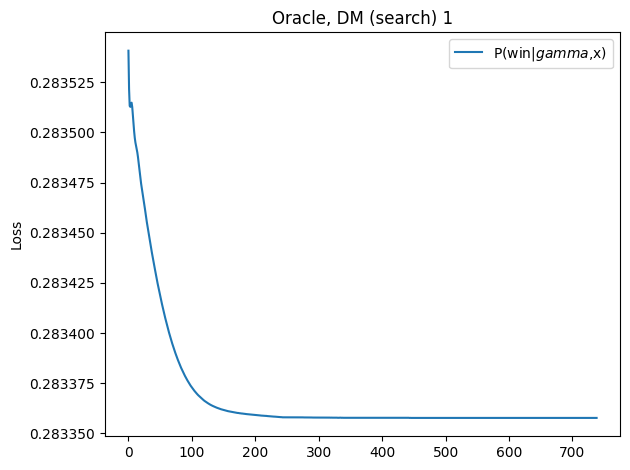

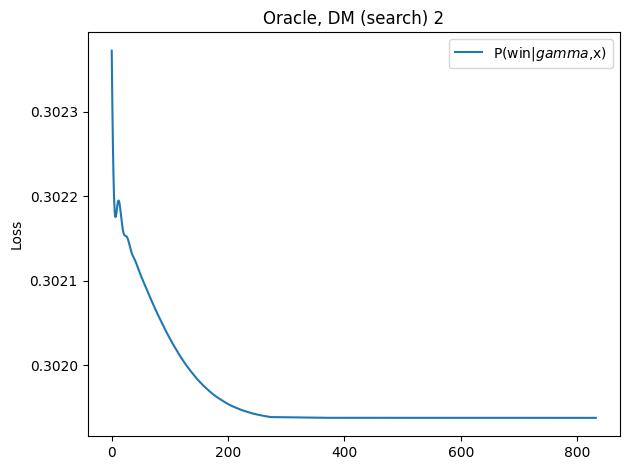

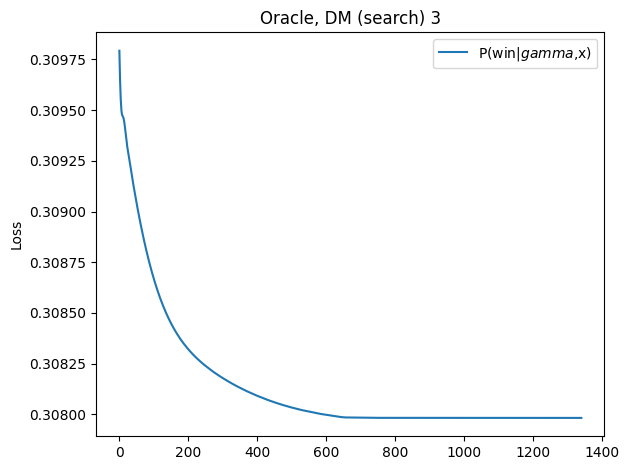

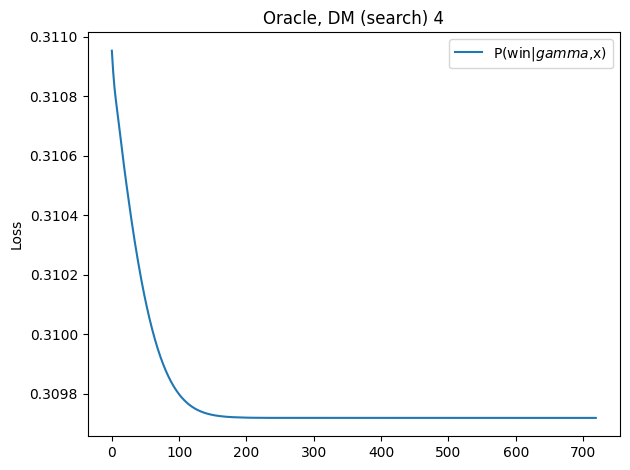

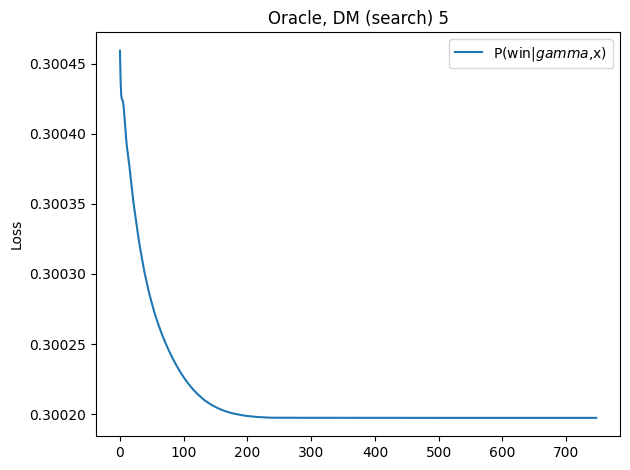

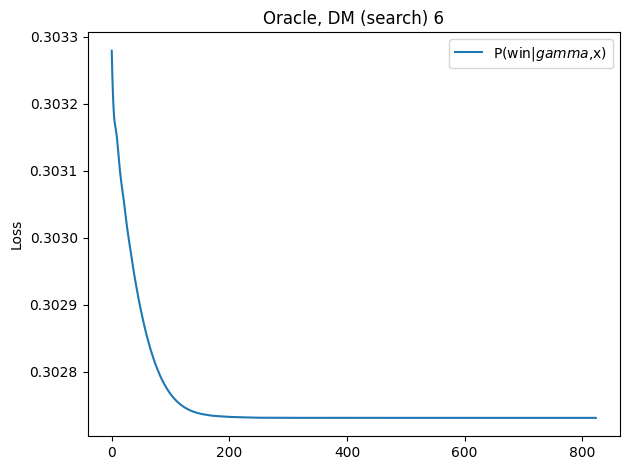

In [4]:
shaded_revenue, shaded_welfare, shaded_surplus = run_repeated_auctions()

In [5]:
def set_truthful_bidders(agent_configs):
    for agent_config in agent_configs:        
        agent_config['bidder'] = {
            'type': 'TruthfulBidder',
            'kwargs': {}
        }
set_truthful_bidders(agent_configs)
truthful_revenue, truthful_welfare, truthful_surplus = run_repeated_auctions()

  0%|          | 0/20 [00:00<?, ?it/s]

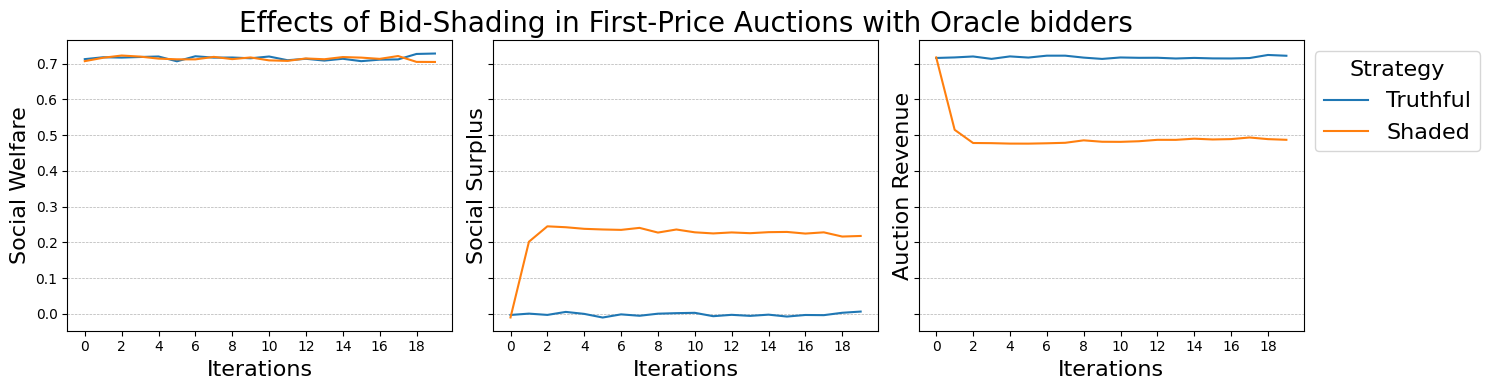

In [7]:
fontsize=16
fig, axes = plt.subplots(1, 3, sharey='row', figsize=(15,4))

axes[0].plot(truthful_welfare, label=f'Truthful')
axes[1].plot(truthful_surplus, label=f'Truthful')
axes[2].plot(truthful_revenue, label=f'Truthful')

axes[0].plot(shaded_welfare, label=f'Shaded')
axes[1].plot(shaded_surplus, label=f'Shaded')
axes[2].plot(shaded_revenue, label=f'Shaded')

axes[1].set_title('Effects of Bid-Shading in First-Price Auctions with Oracle bidders', fontsize=fontsize+4)

for i in range(3):
    axes[i].set_xlabel('Iterations', fontsize=fontsize)
    axes[i].set_xticks(list(range(0,len(truthful_revenue),2)))
    axes[i].grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    
axes[0].set_ylabel('Social Welfare', fontsize=fontsize)
axes[1].set_ylabel('Social Surplus', fontsize=fontsize)
axes[2].set_ylabel('Auction Revenue', fontsize=fontsize)

legend = axes[2].legend(loc='upper left',
                        bbox_to_anchor=(1.0, 1.0),
                        fontsize=fontsize)
legend.set_title('Strategy', prop={'size': fontsize})
fig.tight_layout()

plt.show()

The leftmost plot shows social welfare (the sum of generated welfare over all participants in the auction).
Whether participants shade their bids (or not) does not have affect welfare: indeed, the value that is generated by the ads that are shown remains unchanged.

The middle plot shows social surplus.
Bidding truthfully in a first-price auction gives an expected surplus of 0.
As bidders start to shade their bids, we can see that bidders succesfully generate surplus.

The rightmost plot shows revenue for the auctioneer.
When bidders bid truthfully, the monetary value for all generated welfare goes to the auctioneer.
As bidders start to shade their bids, we can see that revenue diminishes as surplus increases.